## Loading basic libraries

In [ ]:
%%capture
try:
    import pandas, matplotlib, numpy, sklearn
except ImportError as e:
    !pip install pandas matplotlib numpy scikit-learn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ETTh1 Dataset

## descriptive statistics

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv',
                 parse_dates=['date'])

# Display the first few rows of the dataset
data.head()

date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2 2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3 2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4 2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

In [ ]:
# Descriptive statistics
descriptive_stats = data.drop("date", axis=1).describe().round(2)
descriptive_stats

HUFL      HULL      MUFL      MULL      LUFL      LULL        OT
count  17420.00  17420.00  17420.00  17420.00  17420.00  17420.00  17420.00
mean       7.38      2.24      4.30      0.88      3.07      0.86     13.32
std        7.07      2.04      6.83      1.81      1.16      0.60      8.57
min      -22.71     -4.76    -25.09     -5.93     -1.19     -1.37     -4.08
25%        5.83      0.74      3.30     -0.28      2.32      0.67      6.96
50%        8.77      2.21      5.97      0.96      2.83      0.98     11.40
75%       11.79      3.68      8.64      2.20      3.62      1.22     18.08
max       23.64     10.11     17.34      7.75      8.50      3.05     46.01

The descriptive statistics for each column are shown in the table. Key observations include:
*   HUFL, HULL, MUFL, MULL, LUFL, LULL: The mean and standard deviation vary significantly across these columns, with some columns having negative minimum values, indicating potential outliers or errors.
*   OT: The target variable (Oil Temperature) has a mean of 13.32 and a standard deviation of 8.57, with a minimum value of -4.08, which could be worth investigating.




In [ ]:
data.median()

date    2017-06-28 21:30:00
HUFL                  8.774
HULL                   2.21
MUFL                   5.97
MULL                  0.959
LUFL                  2.833
LULL                  0.975
OT                   11.396
dtype: object

## Data Visualization

<Figure size 1400x1000 with 0 Axes>

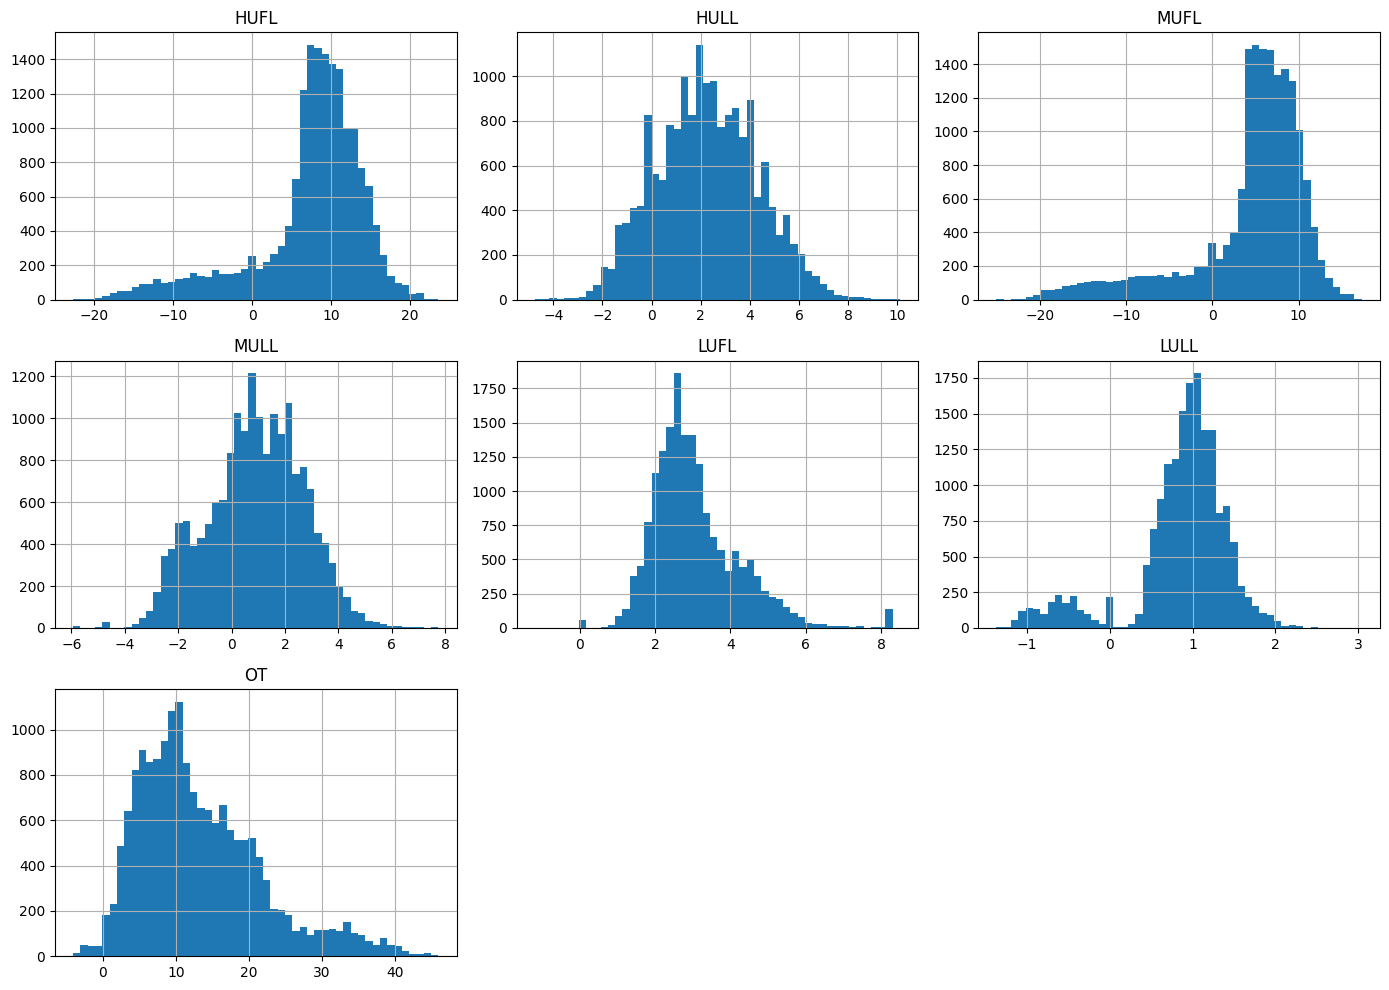

In [ ]:
# Visualize distributions using histograms
import matplotlib.pyplot as plt

# Setting the size of the plots
plt.figure(figsize=(14, 10))

# Plotting histograms for each column
data.drop("date", axis=1).hist(bins=50, figsize=(14,10))
plt.tight_layout()
plt.title("Distributions of time series")
plt.legend()
plt.show()

Most features exhibit a somewhat normal distribution but with noticeable skewness and potential outliers.

In [ ]:
from scipy.stats import shapiro, kstest, anderson

for col in data.columns:
    if col == "date":
        continue

    # Shapiro-Wilk Test
    stat, p = shapiro(data[col])
    print(col)
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Kolmogorov-Smirnov Test
    stat, p = kstest(data[col], 'norm')
    print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Anderson-Darling Test
    result = anderson(data[col], dist='norm')
    print('Anderson-Darling Test: Statistic=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


    print("="*100)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


HUFL
Shapiro-Wilk Test: Statistics=0.882, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.826, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=679.111
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
HULL
Shapiro-Wilk Test: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.577, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=10.536
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
MUFL
Shapiro-Wilk Test: S

ValueError: num must be an integer with 1 <= num <= 6, not 7

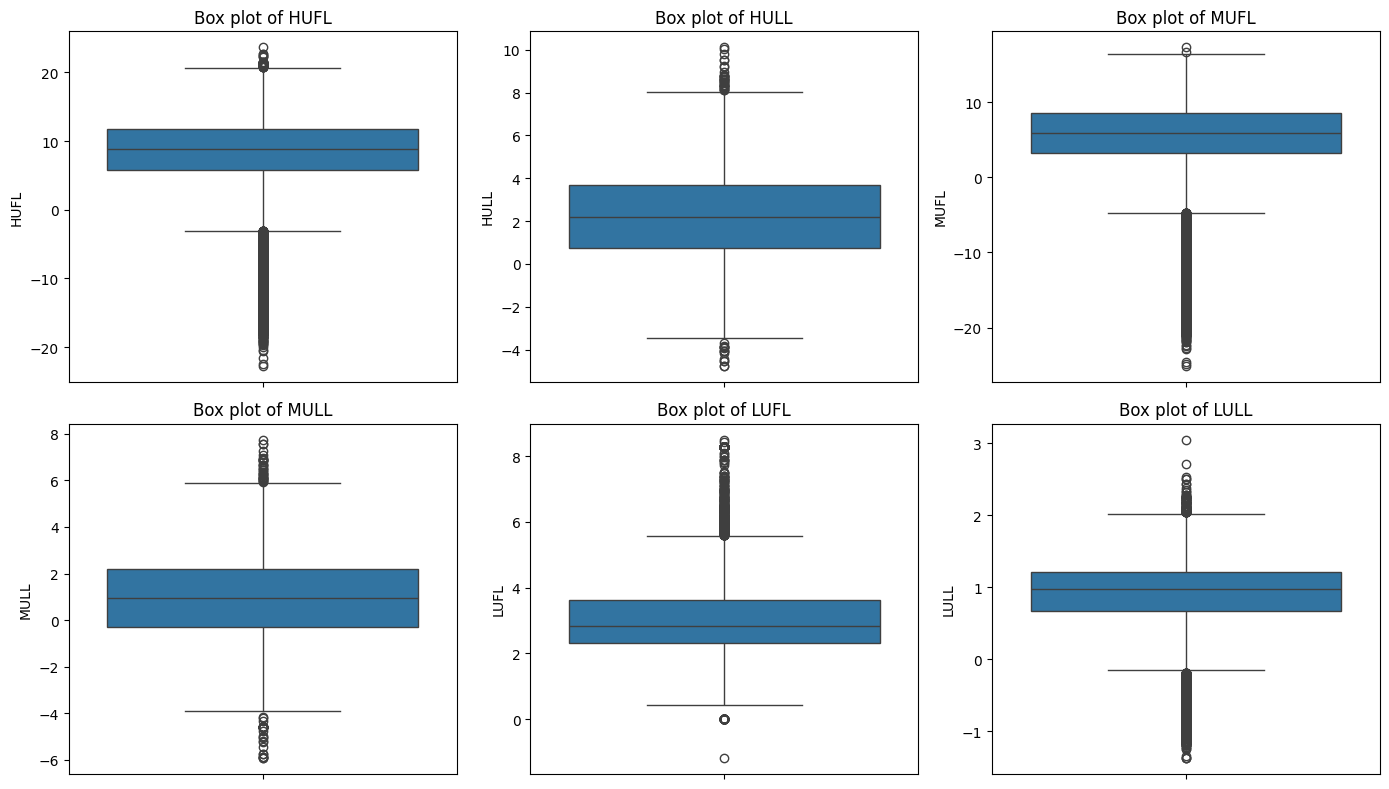

In [ ]:
plt.figure(figsize=(14, 8))
columns = [col for col in data.columns if col != "date"]
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

## Time Series Plots

In [ ]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Setting the 'date' column as the index
data.set_index('date', inplace=True)

<ipython-input-23-9f1b33e16a2d>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(data.columns), 1, i)


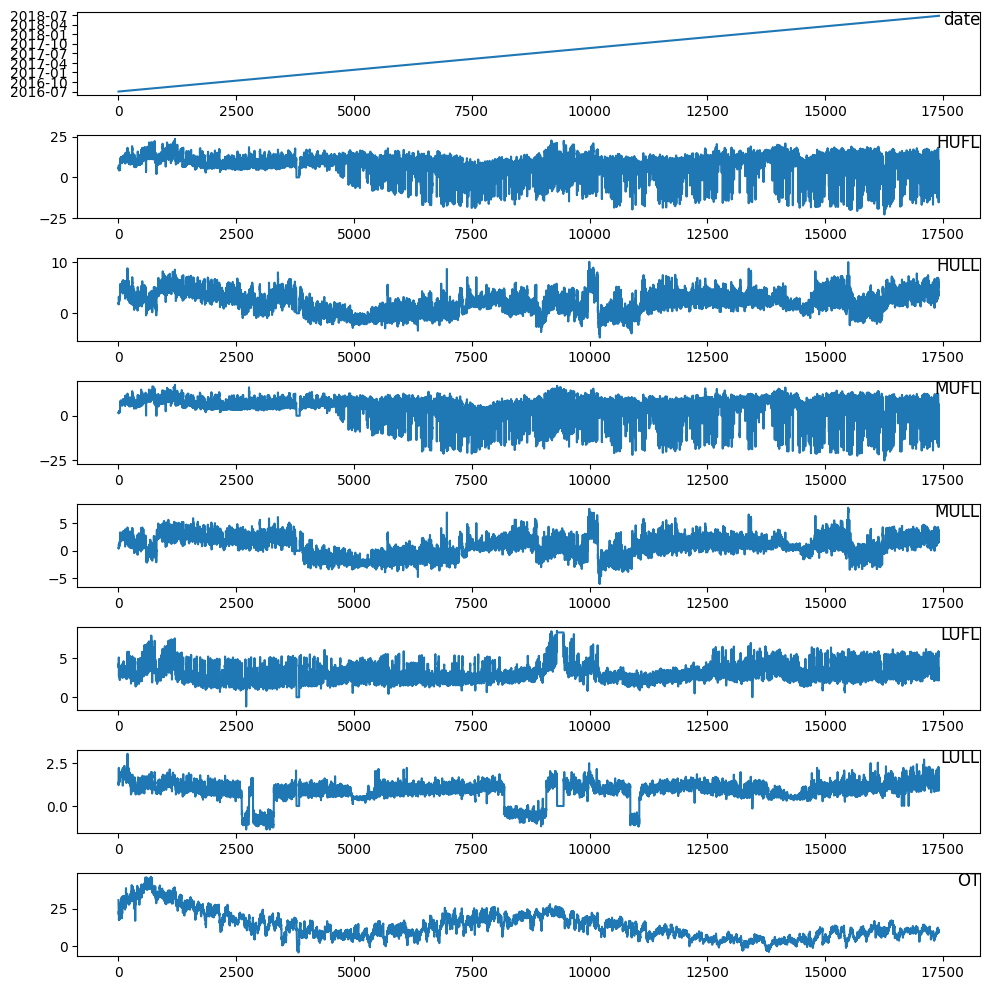

In [ ]:
# Plotting the time series for each feature
plt.figure(figsize=(10, 10))
plt.title("Time Series visualisation fot each columns")

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column])
    plt.title(column, y=0.75, loc='right')
    plt.tight_layout()

plt.show()






*   HUFL, HULL, MUFL, MULL, LUFL, LULL: These features exhibit periodic patterns, suggesting seasonality and trends over time.
*   OT (Oil Temperature): The target variable also shows clear seasonal patterns and trends.



## Correlation Analysis

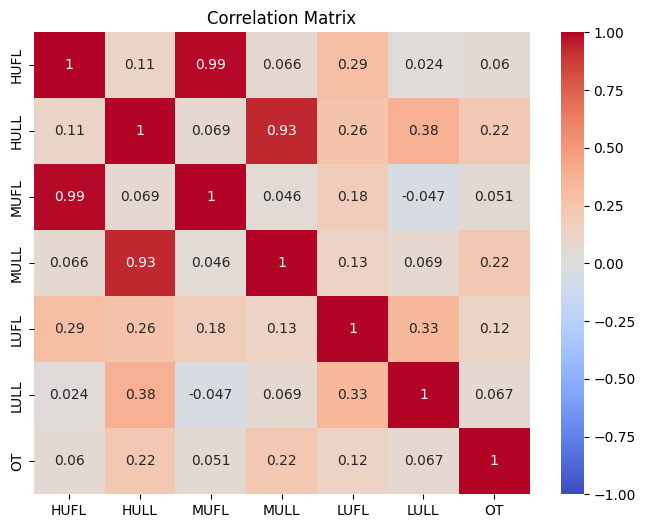

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**High Correlations:**

HUFL and MUFL: Almost perfect correlation (0.99), indicating that these features are likely measuring very similar or the same underlying process.
HULL and MULL: Very high correlation (0.93), suggesting they are closely related and possibly interchangeable in models.

**Moderate Correlations:**

HUFL and LUFL: Moderate correlation (0.29), suggesting some relationship but not as strong as HUFL with MUFL.
LUFL and LULL: Moderate correlation (0.33), indicating some dependency between these features.

**Weak Correlations:**

OT: Generally weak correlations with other features, suggesting that Oil Temperature is influenced by factors not strongly captured by these features. The highest correlations are with HULL and MULL (0.22), which could be explored further.

## Missing values and outliers

In [ ]:
missing_values = pd.DataFrame(data.isnull().sum(), columns =["missing_values"]).T
missing_values

HUFL  HULL  MUFL  MULL  LUFL  LULL  OT
missing_values     0     0     0     0     0     0   0

There are no missing values in the dataset

In [ ]:
# Check for outliers using Z-scores
from scipy import stats

z_scores = stats.zscore(data)
outliers = (abs(z_scores) > 3).sum(axis=0)

pd.DataFrame(outliers, columns =["outliers"]).T

HUFL  HULL  MUFL  MULL  LUFL  LULL   OT
outliers   297    41   366    61   219   323  159

## Seasonality and Trend Analysis

The time series decomposition of the 'OT' (Oil Temperature) data shows the following components:

* Observed: The original time series data.
* Trend: A clear trend component indicating long-term movements in the data.
* Seasonal: A strong weekly seasonal pattern is observed, confirming periodic behavior.
* Residual: The noise or irregular component after removing the trend and seasonal components.

**Moving Averages**

The 0.5-day, 1-day, 7-day and 30-day moving averages help to smooth out short-term fluctuations and highlight longer-term trends in the 'OT' series.

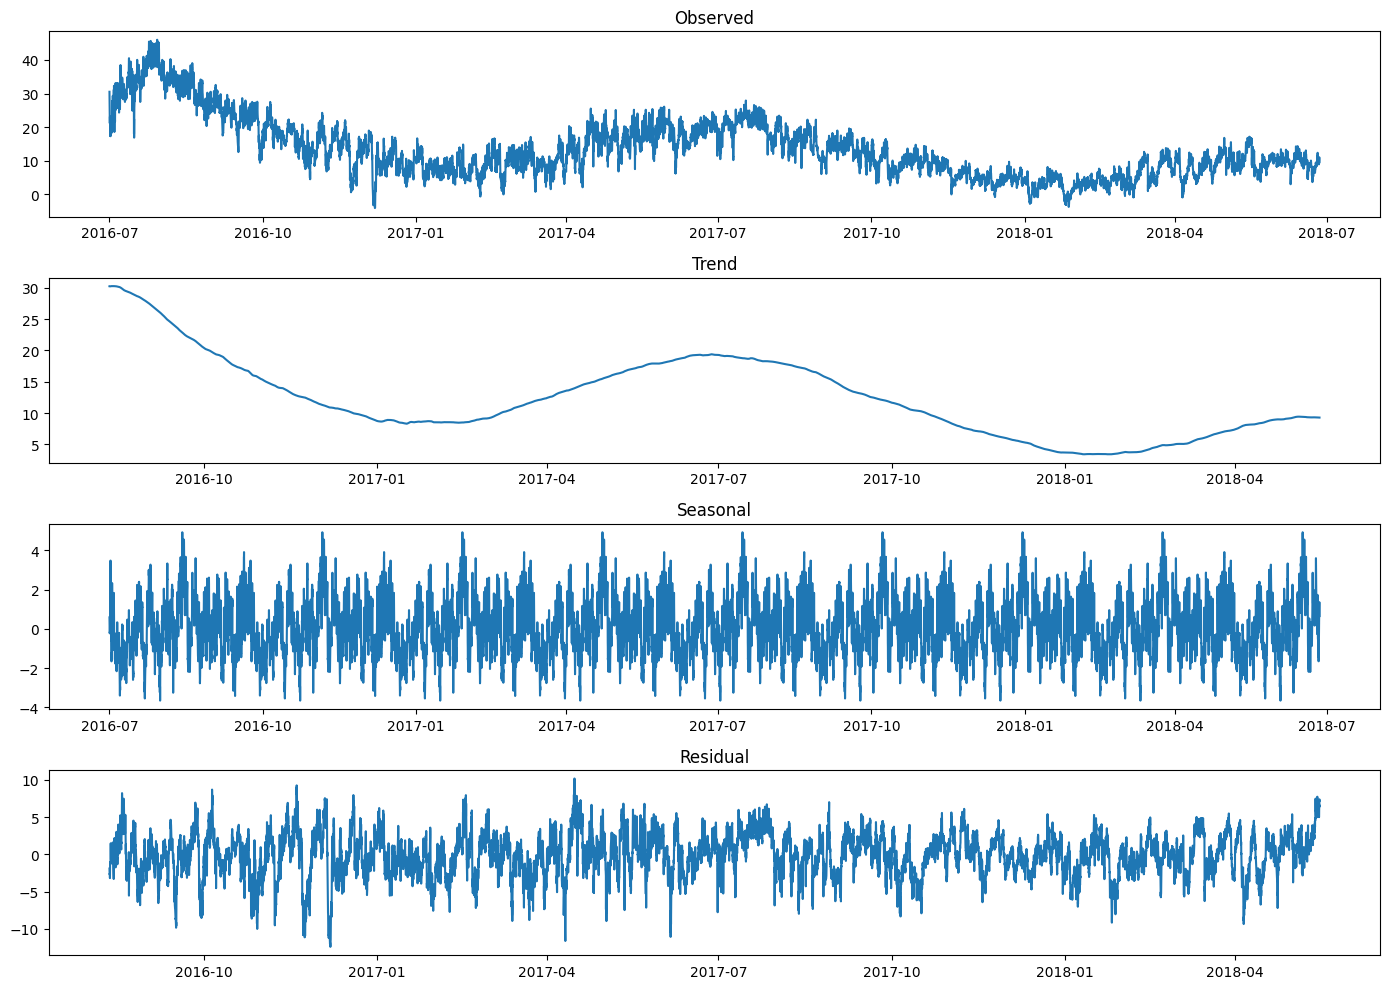

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'OT' time series
decomposition = seasonal_decompose(data['OT'], model='additive', period=24*7*12)  # Assuming daily data with weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


The strong seasonal pattern indicates that the oil temperature exhibits regular fluctuations within each half-a-year and a quarter.

The residuals show some irregular variations, but their behavior seems relatively stable over time.

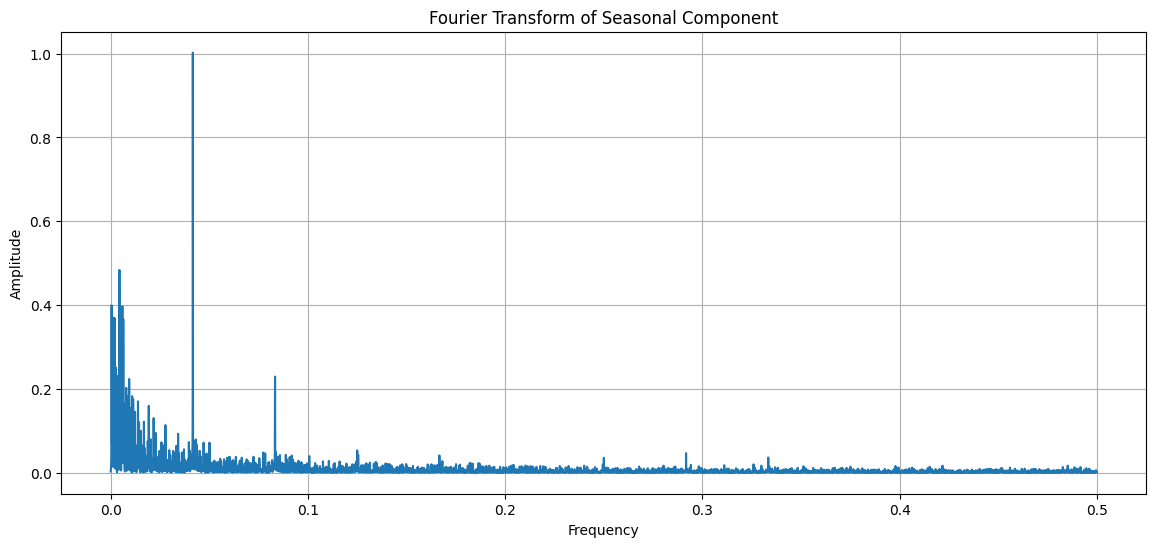

In [ ]:
from scipy.fft import fft

seasonal_component = decomposition.seasonal.dropna()
# Convert the seasonal component to a numpy array
seasonal_component_np = seasonal_component.to_numpy()

# Perform Fourier Transform on the seasonal component
fft_values = fft(seasonal_component_np)
fft_freqs = np.fft.fftfreq(len(seasonal_component_np))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_fft_values = 2.0/len(seasonal_component_np) * np.abs(fft_values[fft_freqs >= 0])

# Plot the Fourier Transform results
plt.figure(figsize=(14, 6))
plt.plot(positive_freqs, positive_fft_values)
plt.title('Fourier Transform of Seasonal Component')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**Dominant Frequencies:**

* The highest peak at the lowest frequency indicates a strong long-term seasonality.
* Additional peaks at higher frequencies represent shorter periodic cycles, such as daily or weekly patterns.

**Long-term Seasonality:**

* The significant peak at a very low frequency suggests the presence of long-term cycles, potentially quarterly or yearly.
* This confirms the presence of quarterly seasonality observed in the seasonal decomposition.


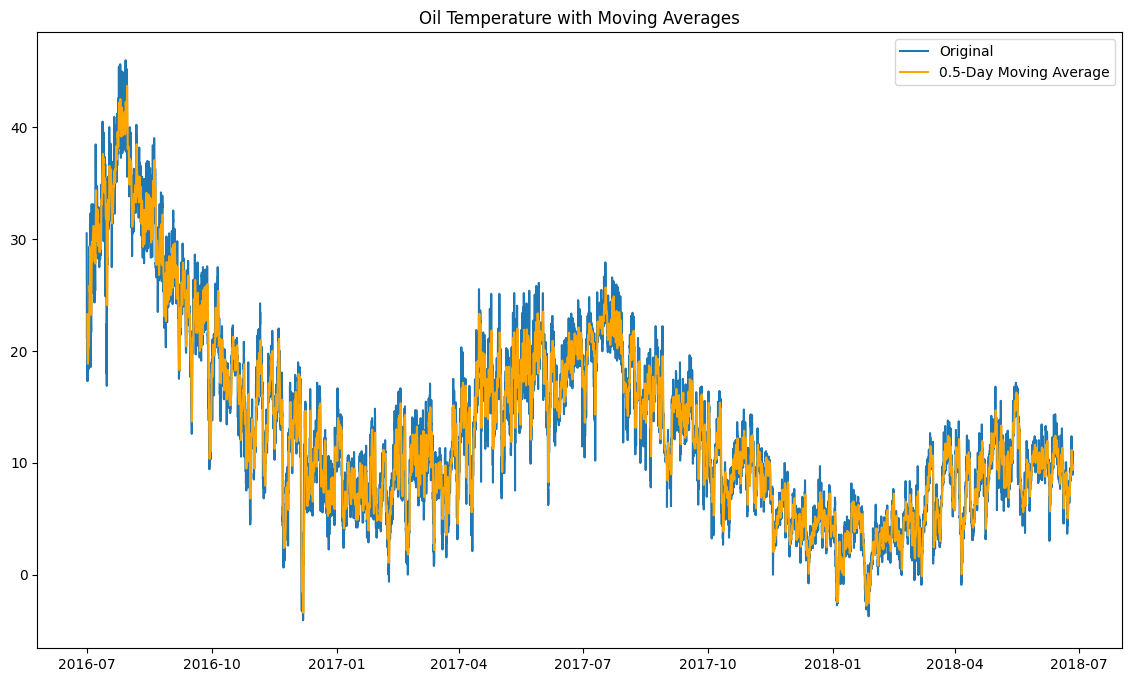

In [ ]:
data['OT_MA_05'] = data['OT'].rolling(window=12).mean()  # 12-hours moving average (168 hours)
data['OT_MA_1'] = data['OT'].rolling(window=24).mean()  # 1-day moving average (168 hours)
data['OT_MA_7'] = data['OT'].rolling(window=24*7).mean()  # 30-day moving average (720 hours)
data['OT_MA_30'] = data['OT'].rolling(window=24*30).mean()  # 30-day moving average (720 hours)

# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_05'], label='0.5-Day Moving Average', color='orange')
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

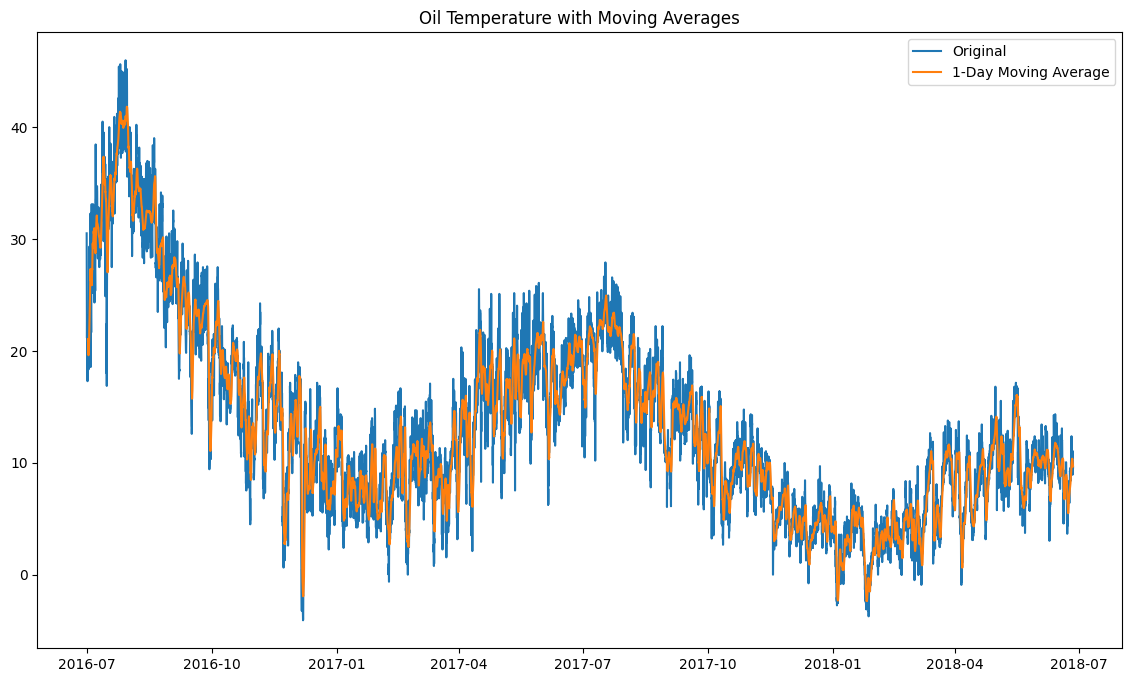

In [ ]:
# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_1'], label='1-Day Moving Average')
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

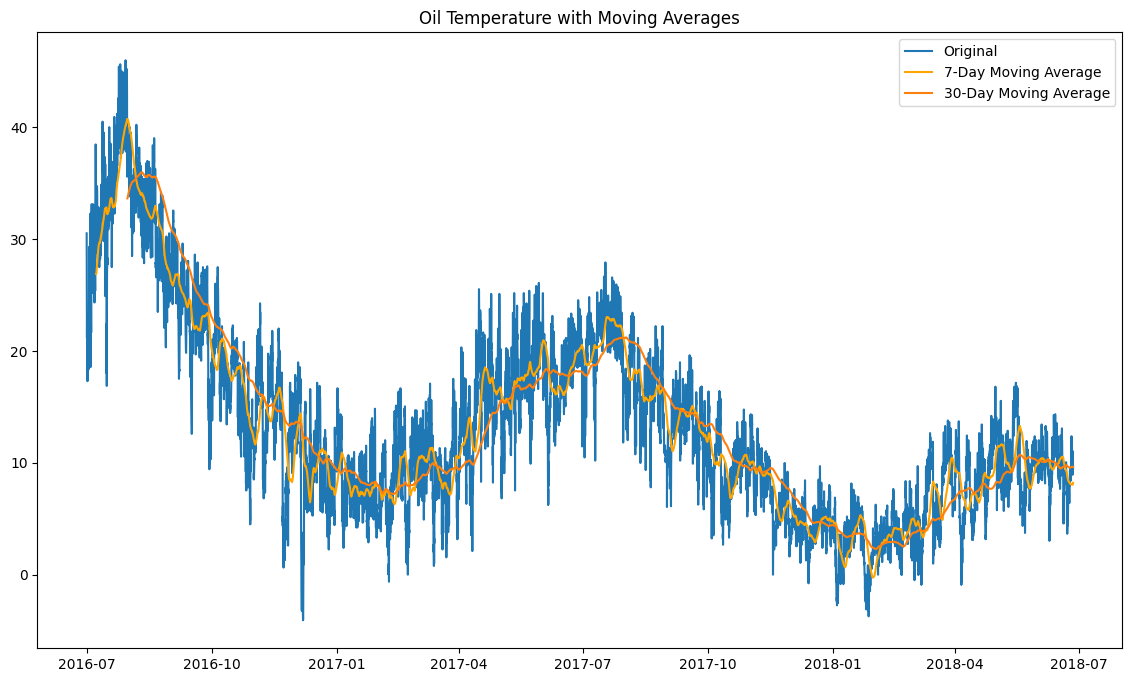

In [ ]:
# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_7'], label='7-Day Moving Average', color='orange')
plt.plot(data['OT_MA_30'], label='30-Day Moving Average')
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

* **Seasonality and Trend:** The 'OT' series exhibits a clear trend and strong daily seasonality.
* Moving Averages: The 7-day and 30-day moving averages smooth out short-term fluctuations and highlight longer-term trends.


## Autocorrelation Analysis

**Autocorrelation Function (ACF)**

The ACF plot for the 'OT' series shows significant autocorrelations at multiple lags, indicating that the series is not white noise and exhibits dependencies over time. The presence of significant lags suggests seasonality.


**Partial Autocorrelation Function (PACF)**

The PACF plot indicates the partial correlation of the series with its own lags. The first few lags show significant partial autocorrelations, which will help in identifying the order of the AR component in the ARIMA model.

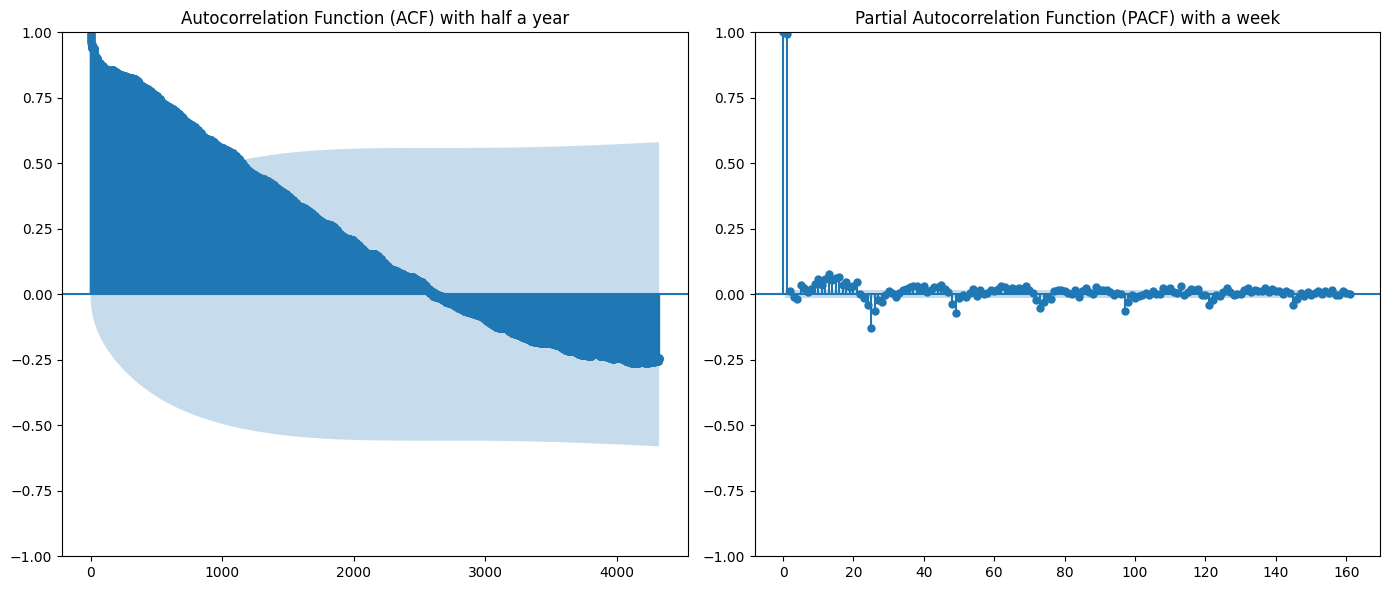

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for 'OT'
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(data['OT'], lags=24*30*6, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) with half a year')

plt.subplot(122)
plot_pacf(data['OT'], lags=23*7, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) with a week')

plt.tight_layout()
plt.show()

ACF Plot:

Shows strong persistence and long-term trends in the time series.
Significant autocorrelation at multiple lags, indicating past values influence future values over long periods.

PACF Plot:

Highlights the significance of the immediate past value.
Subsequent lags have much less influence once the immediate past value is accounted for.

Confidence Intervals:

The light blue area represents the 95% confidence interval.
Autocorrelation and partial autocorrelation values outside this area are statistically significant.

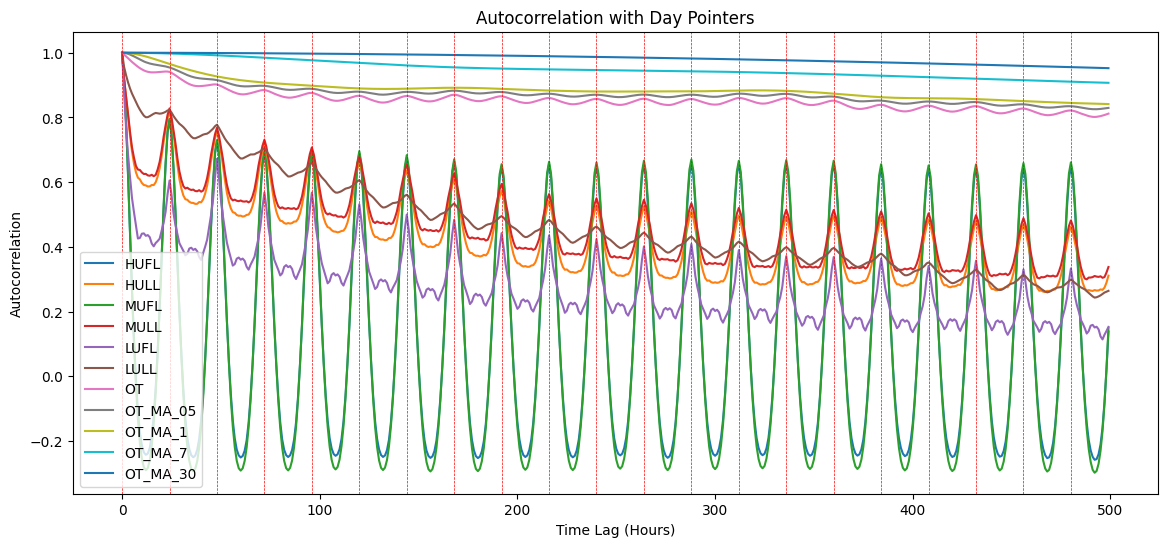

In [ ]:
lags = 500

plt.figure(figsize=(14, 6))
for column in data.columns:
    if column != "date":
        autocorrelations = [data[column].autocorr(lag) for lag in range(lags)]
        plt.plot(range(lags), autocorrelations, label=column)

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 24):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation with Day Pointers')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

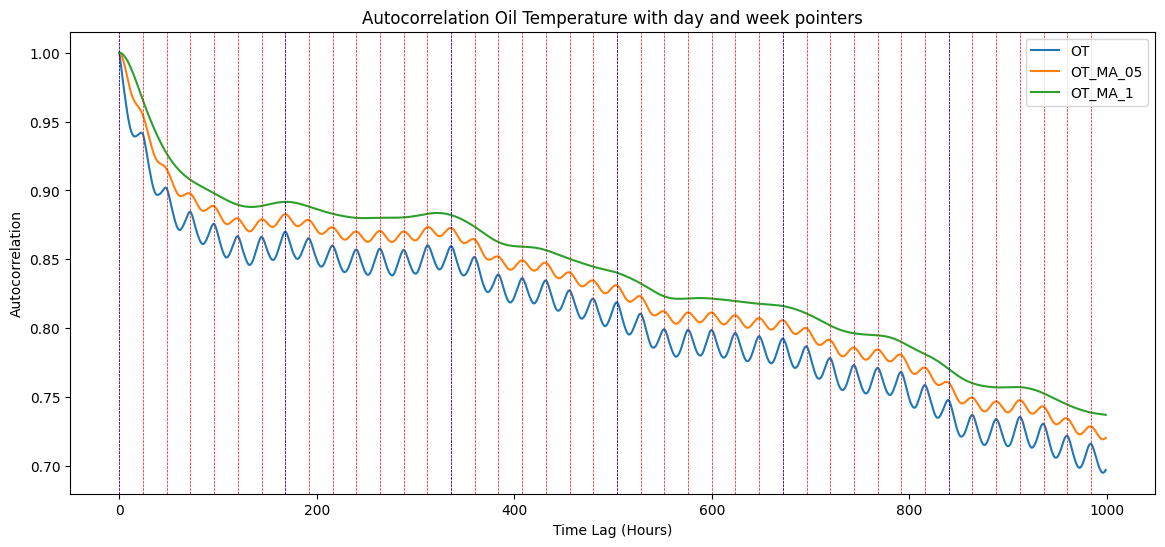

In [ ]:
lags = 1000

plt.figure(figsize=(14, 6))
autocorrelations = [data["OT"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT")
autocorrelations = [data["OT_MA_05"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT_MA_05")
autocorrelations = [data["OT_MA_1"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT_MA_1")

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 24):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)
for day in range(0, lags, 168):
    plt.axvline(x=day, color='blue', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation Oil Temperature with day and week pointers')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

* The autocorrelation values show a gradual decline, indicating a strong correlation with past values.
* The periodic spikes suggest the presence of seasonality.

1. Daily Cycles:

  * The vertical lines at every 24-hour interval highlight the daily cycles in the data.
  * Several features exhibit significant autocorrelation at these daily intervals, confirming daily periodicity, but 12-hour interval clearly highlight the data cycles.

2. Weekly and Longer-Term Patterns:

  * Peaks at 168-hour intervals (7 days, blue lines) suggest weekly cycles, particularly for certain features like HUFL, HULL, MUFL, MULL, LUFL, and LULL.
  * The periodicity is consistent across different features, not indicating regular weekly patterns.

3. Comparison Across Features:

  * Different features show varying levels of autocorrelation, but the periodic nature is evident in all.
  * OT: High autocorrelation, indicating strong daily patterns and predictability.
  * HUFL, HULL, MUFL, MULL, LUFL: High autocorrelation, indicating strong persistence and patterns.
  * LULL: Lower autocorrelation, indicating less persistence and more randomness.

## Autocorrelation analysis based on minutes

In [ ]:
# Load the dataset
data_m = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTm1.csv',
                 parse_dates=['date'])

# Display the first few rows of the dataset
data_m.head()

date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999
2 2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000
3 2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000
4 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001

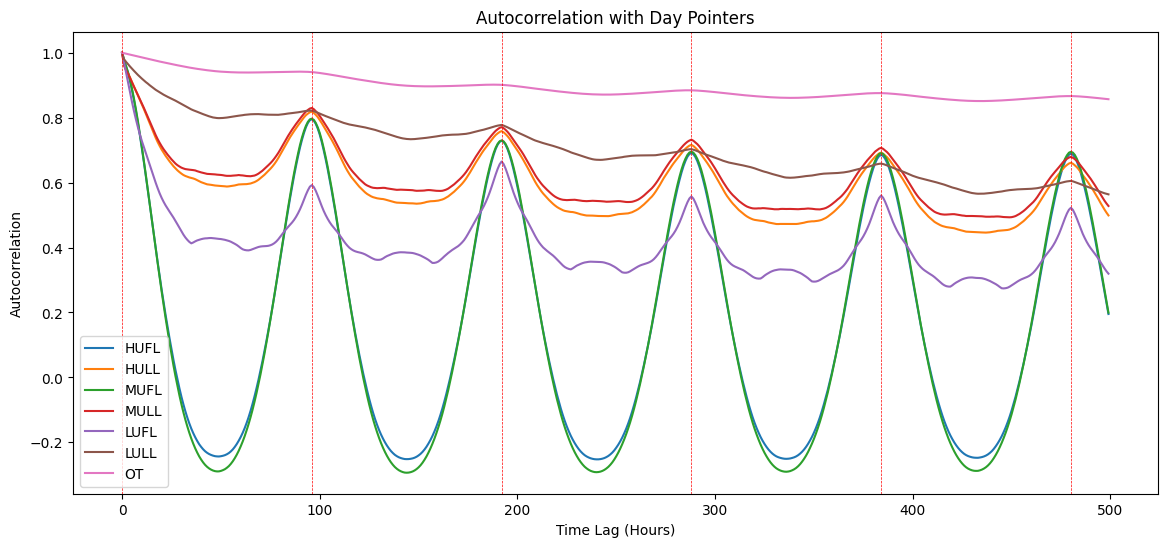

In [ ]:
lags = 500

plt.figure(figsize=(14, 6))
for column in data_m.columns:
    if column != "date":
        autocorrelations = [data_m[column].autocorr(lag) for lag in range(lags)]
        plt.plot(range(lags), autocorrelations, label=column)

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 96):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation with Day Pointers based on ETTm1 dataset')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

It makes clear the correlation for HUFL and MUFL, HULL and MULL

## Regression Analysis Summary

To understand the influence of external factors on the observed periodic patterns, we can perform a regression analysis. This will help us quantify the impact of external variables on the Oil Temperature (OT) and other features.

In [ ]:
X

const    HUFL   HULL   MUFL   MULL   LUFL   LULL
date                                                                 
2016-07-01 00:00:00    1.0   5.827  2.009  1.599  0.462  4.203  1.340
2016-07-01 01:00:00    1.0   5.693  2.076  1.492  0.426  4.142  1.371
2016-07-01 02:00:00    1.0   5.157  1.741  1.279  0.355  3.777  1.218
2016-07-01 03:00:00    1.0   5.090  1.942  1.279  0.391  3.807  1.279
2016-07-01 04:00:00    1.0   5.358  1.942  1.492  0.462  3.868  1.279
...                    ...     ...    ...    ...    ...    ...    ...
2018-06-26 15:00:00    1.0  -1.674  3.550 -5.615  2.132  3.472  1.523
2018-06-26 16:00:00    1.0  -5.492  4.287 -9.132  2.274  3.533  1.675
2018-06-26 17:00:00    1.0   2.813  3.818 -0.817  2.097  3.716  1.523
2018-06-26 18:00:00    1.0   9.243  3.818  5.472  2.097  3.655  1.432
2018-06-26 19:00:00    1.0  10.114  3.550  6.183  1.564  3.716  1.462

[17420 rows x 7 columns]

In [ ]:
import numpy as np
import statsmodels.api as sm

# Define the target and features
X = data.drop("OT", axis=1)
y = data['OT']

# Add a constant term for the regression intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     OT   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     188.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          9.24e-234
Time:                        20:48:07   Log-Likelihood:                -61585.
No. Observations:               17420   AIC:                         1.232e+05
Df Residuals:                   17413   BIC:                         1.232e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6505      0.194     54.907      0.000      10.270      11.031
HUFL          -0.6585      0.089     -7.383      0.000      -0.833      -0.484
HULL           0.1033      0.172      0.600      0.548      -0.234       0.441
MUFL           0.6960      0.090      7.757      0.000       0.520       0.872
MULL           0.8864      0.179      4.960      0.000       0.536       1.237
LUFL           0.9958      0.082     12.090      0.000       0.834       1.157
LULL           0.5501      0.209      2.633      0.008       0.141       0.959
==============================================================================
Omnibus:                     1465.798   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1898.947
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                       3.639   Cond. No.                         65.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model explains 6,1% of the variance in the 'OT' variable

## Residual Analysis

### normality check

In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Extract residuals
residuals = model.resid

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)

# Perform Durbin-Watson test for autocorrelation
durbin_watson_test = durbin_watson(residuals)

shapiro_test, durbin_watson_test


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9392189979553223, pvalue=0.0), 0.011092762461328513)

Shapiro-Wilk Test for Normality
Statistic: 0.9392
p-value: 0.0 (p-value may not be accurate for N > 5000). The Shapiro-Wilk test indicates that the residuals do not follow a normal distribution (p-value < 0.05). The residuals exhibit significant autocorrelation, suggesting that the model has not fully captured the time-dependent structure in the data.

The Durbin-Watson statistic is close to 0, indicating strong positive autocorrelation in the residuals. The non-normality of residuals further indicates that there may be other factors or nonlinear relationships that the current model does not account for.

## stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(data['OT'])

# Extract the test statistics
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

(adf_statistic, p_value, critical_values)

print(adf_statistic)

(-3.487963577593398,
 0.008301649485465485,
 {'1%': -3.4307264182079904,
  '5%': -2.8617063622340195,
  '10%': -2.566858550311889})

The ADF test statistic (-3.49) is less than the critical values at all significance levels (1%, 5%, and 10%). Additionally, the p-value (0.0083) is less than 0.05. Therefore, we reject the null hypothesis that the series has a unit root, indicating that the 'OT' series is stationary.

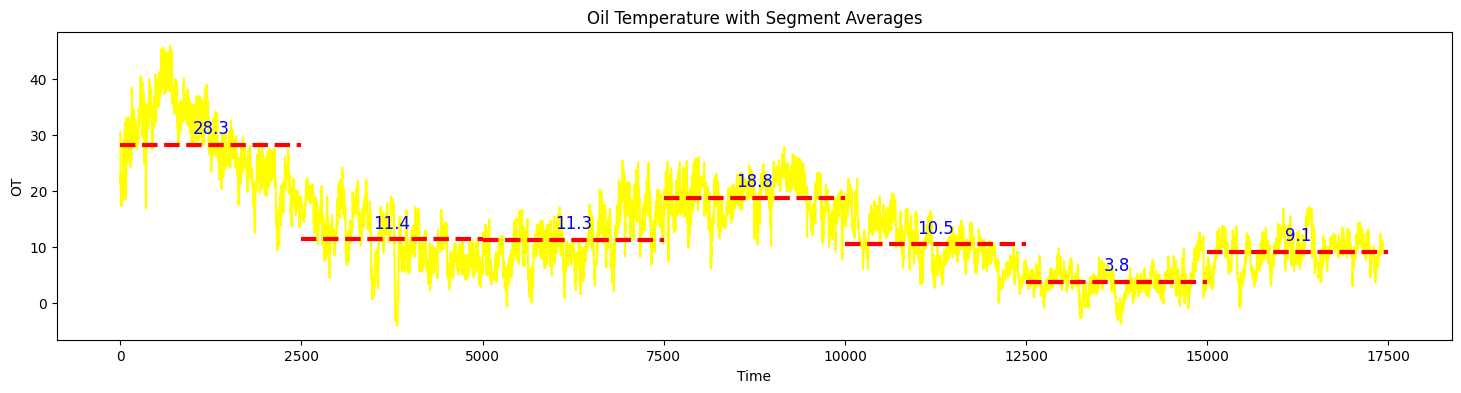

In [ ]:
import matplotlib.pyplot as plt

# Define segments and calculate average values for each segment
segment_indices = [(0, 2500), (2500, 5000), (5000, 7500), (7500, 10000), (10000, 12500), (12500, 15000), (15000, 17500)]
segment_averages = [(start, end, data['OT'][start:end].mean()) for start, end in segment_indices]

# Plot the 'OT' series with segment averages
plt.figure(figsize=(18, 4))
plt.plot(data['OT'].values, color="yellow")

# Add horizontal lines and labels for each segment
for start, end, avg in segment_averages:
    medium = (start + end) / 2
    plt.hlines(y=avg, xmin=start, xmax=end, colors='red', linestyles='dashed', linewidth=3)
    plt.text(medium, avg + 2, f'{avg:.1f}', color='blue', fontsize=12, ha='center')

plt.xlabel('Time')
plt.ylabel('OT')
plt.title('Oil Temperature with Segment Averages')
plt.show()


The mean is not equal during the time

## arima etth1 dataset

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv',
                 parse_dates=['date'])

# Display the first few rows of the dataset
data.drop("date", axis = 1)

HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0       5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1       5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2       5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3       5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4       5.358  1.942  1.492  0.462  3.868  1.279  21.948000
...       ...    ...    ...    ...    ...    ...        ...
17415  -1.674  3.550 -5.615  2.132  3.472  1.523  10.904000
17416  -5.492  4.287 -9.132  2.274  3.533  1.675  11.044000
17417   2.813  3.818 -0.817  2.097  3.716  1.523  10.271000
17418   9.243  3.818  5.472  2.097  3.655  1.432   9.778000
17419  10.114  3.550  6.183  1.564  3.716  1.462   9.567000

[17420 rows x 7 columns]

In [21]:
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
data_without_date = data.drop("date", axis = 1)
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Setting the 'date' column as the index
data.set_index('date', inplace=True)
# Define the target columns (channels)
target_cols = ["OT"]

# Define the split configuration
split_config = {
    "train": [0, 12 * 30 * 24],
    "valid": [12 * 30 * 24, 12 * 30 * 24 + 4 * 30 * 24],
    "test": [12 * 30 * 24 + 4 * 30 * 24, 12 * 30 * 24 + 8 * 30 * 24],
}

# Split the data according to the configuration
train_data = data.iloc[split_config["train"][0]:split_config["train"][1]]
valid_data = data.iloc[split_config["valid"][0]:split_config["valid"][1]]
test_data = data.iloc[split_config["test"][0]:split_config["test"][1]]

In [11]:




# Function to check stationarity and difference the data
def make_stationary(data, target_cols):
    differenced_data = data.copy()
    for col in target_cols:
        adf_result = adfuller(differenced_data[col])
        while adf_result[1] > 0.05:  # If p-value is greater than 0.05, the series is not stationary
            differenced_data[col] = differenced_data[col].diff().dropna()
            adf_result = adfuller(differenced_data[col].dropna())
    return differenced_data

# Make the train and test data stationary
train_data_stationary = make_stationary(train_data, target_cols)
test_data_stationary = make_stationary(test_data, target_cols)

# Function to evaluate ARIMA model for multi-channel data
def evaluate_arima_multi_channel(train, test, order, forecast_horizon, target_cols):
    history = {col: train[col].tolist() for col in target_cols}
    predictions = {col: [] for col in target_cols}

    for t in tqdm(range(len(test))):
        for col in target_cols:
            model = ARIMA(history[col], order=order)
            model_fit = model.fit()
            output = model_fit.forecast(steps=forecast_horizon)
            yhat = output[-1]
            predictions[col].append(yhat)
            history[col].append(test[col].iloc[t])

    mse = {col: mean_squared_error(test[col], predictions[col]) for col in target_cols}
    mae = {col: mean_absolute_error(test[col], predictions[col]) for col in target_cols}
    return mse, mae, predictions

# Evaluate ARIMA models
forecast_horizon = 96
order = (5, 1, 0)
mse, mae, predictions = evaluate_arima_multi_channel(train_data_stationary, test_data_stationary, order, forecast_horizon, target_cols)

# Display the results
print('MSE per channel:')
for col in mse:
    print(f'{col}: {mse[col]}')

print('\nMAE per channel:')
for col in mae:
    print(f'{col}: {mae[col]}')

# Calculate and display the aggregated MSE
aggregated_mse = sum(mse.values()) / len(mse)
print(f'\nAggregated MSE: {aggregated_mse}')


100%|██████████| 2880/2880 [1:25:18<00:00,  1.78s/it]

MSE per channel:
OT: 0.39888287401059547

MAE per channel:
OT: 0.42800817112002737

Aggregated MSE: 0.39888287401059547


In [51]:
import json

with open("/content/h1_lora_test.json") as f:
    lora_results = json.load(f)

with open("/content/h1_lora_true.json") as f:
    lora_true = json.load(f)

In [39]:
len(lora_results[0])

96

In [50]:
[el[6] for el in lora_results[-1]]

[-1.0936565399169922,
 -1.1601210832595825,
 -1.2017368078231812,
 -1.2815757989883423,
 -1.339895486831665,
 -1.3942079544067383,
 -1.436626672744751,
 -1.4889280796051025,
 -1.5208609104156494,
 -1.4725162982940674,
 -1.3224375247955322,
 -1.1183584928512573,
 -0.9397588968276978,
 -0.8348312377929688,
 -0.7856307029724121,
 -0.794930636882782,
 -0.8460195660591125,
 -0.8984910845756531,
 -0.9459539651870728,
 -1.003086805343628,
 -1.0503114461898804,
 -1.105729341506958,
 -1.156662106513977,
 -1.2121574878692627,
 -1.2743139266967773,
 -1.3166027069091797,
 -1.338043451309204,
 -1.388270616531372,
 -1.4285736083984375,
 -1.4771112203598022,
 -1.5280832052230835,
 -1.5562454462051392,
 -1.5724624395370483,
 -1.5191582441329956,
 -1.3715952634811401,
 -1.1706379652023315,
 -0.9927279353141785,
 -0.9030726552009583,
 -0.8477211594581604,
 -0.8534624576568604,
 -0.891972541809082,
 -0.9353315234184265,
 -0.9713541269302368,
 -1.0489678382873535,
 -1.0875474214553833,
 -1.145832538604736

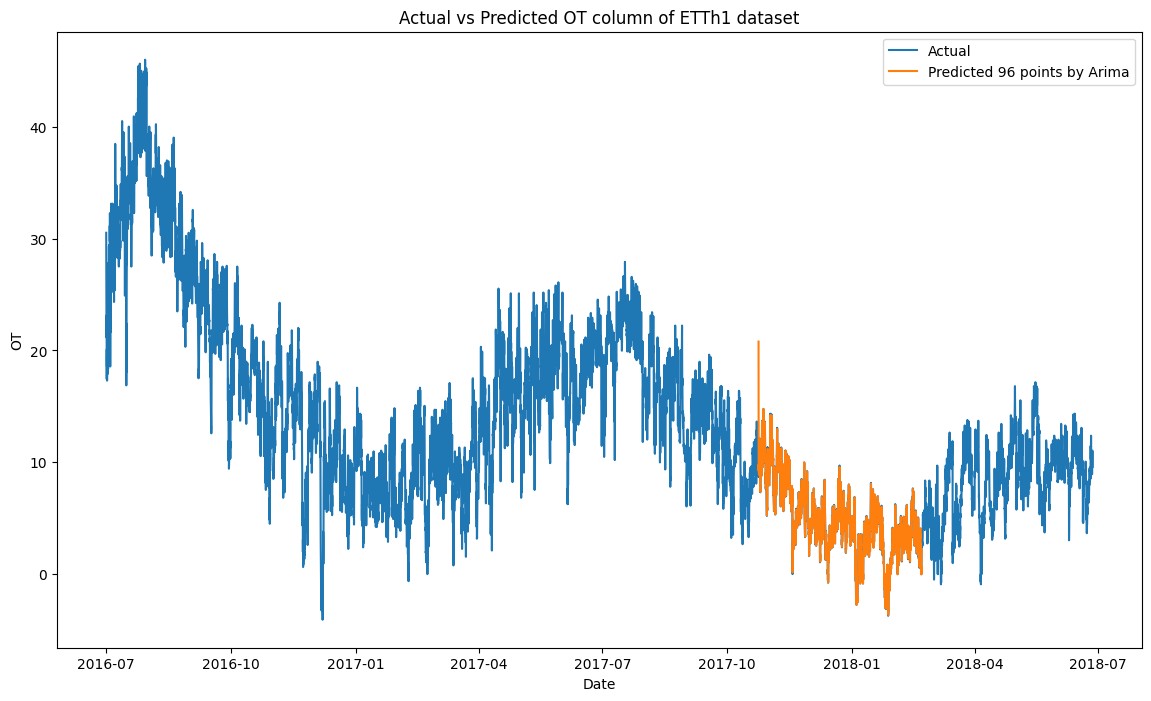

In [69]:
# Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(data.index, data["OT"], label='Actual')
for horizon in [96]:
    plt.plot(test_data.index, predictions["OT"], label=f'Predicted {horizon} points by Arima')
plt.title('Actual vs Predicted OT column of ETTh1 dataset')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.show()

# ETTh2 dataset

## descriptive statistics

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh2.csv',
                 parse_dates=['date'])

# Display the first few rows of the dataset
data.head()

date       HUFL    HULL       MUFL   MULL   LUFL   LULL  \
0 2016-07-01 00:00:00  41.130001  12.481  36.535999  9.355  4.424  1.311   
1 2016-07-01 01:00:00  37.528000  10.136  33.936001  7.532  4.435  1.215   
2 2016-07-01 02:00:00  37.946999  11.309  35.330002  9.007  2.100  0.000   
3 2016-07-01 03:00:00  38.952000  11.895  35.543999  9.436  3.380  1.215   
4 2016-07-01 04:00:00  38.113998  11.476  35.410000  9.623  2.036  0.000   

          OT  
0  38.661999  
1  37.124001  
2  36.465000  
3  33.608501  
4  31.850500

In [ ]:
# Descriptive statistics
descriptive_stats = data.drop("date", axis=1).describe().round(2)
descriptive_stats

HUFL      HULL      MUFL      MULL      LUFL      LULL        OT
count  17420.00  17420.00  17420.00  17420.00  17420.00  17420.00  17420.00
mean      37.19      8.54     43.83      8.32     -3.42     -2.09     26.61
std       10.22      6.02     13.06      4.37      6.14      6.01     11.89
min        0.00    -18.68     11.20     -6.59    -14.35    -31.46     -2.65
25%       30.16      4.52     37.39      5.68     -9.25     -2.51     16.47
50%       37.19      9.13     41.39      9.30     -3.77     -1.23     26.58
75%       44.06     13.15     46.08     11.26      2.53      0.00     35.59
max      107.89     36.44     93.23     28.74     17.22      2.93     58.88

The descriptive statistics for each column are shown in the table. Key observations include:
*   HUFL, HULL, MUFL, MULL, LUFL, LULL: The mean and standard deviation vary significantly across these columns, with some columns having negative minimum values, indicating potential outliers or errors.
*   OT: The target variable (Oil Temperature) has a mean of 26.61 and a standard deviation of 11.89, with a minimum value of -2.65, which could be worth investigating.




По сравнению с другой станцией показатели среднего меньше но стандартное отклонение и минимальное значение больше.

## Data Visualization

<Figure size 1400x1000 with 0 Axes>

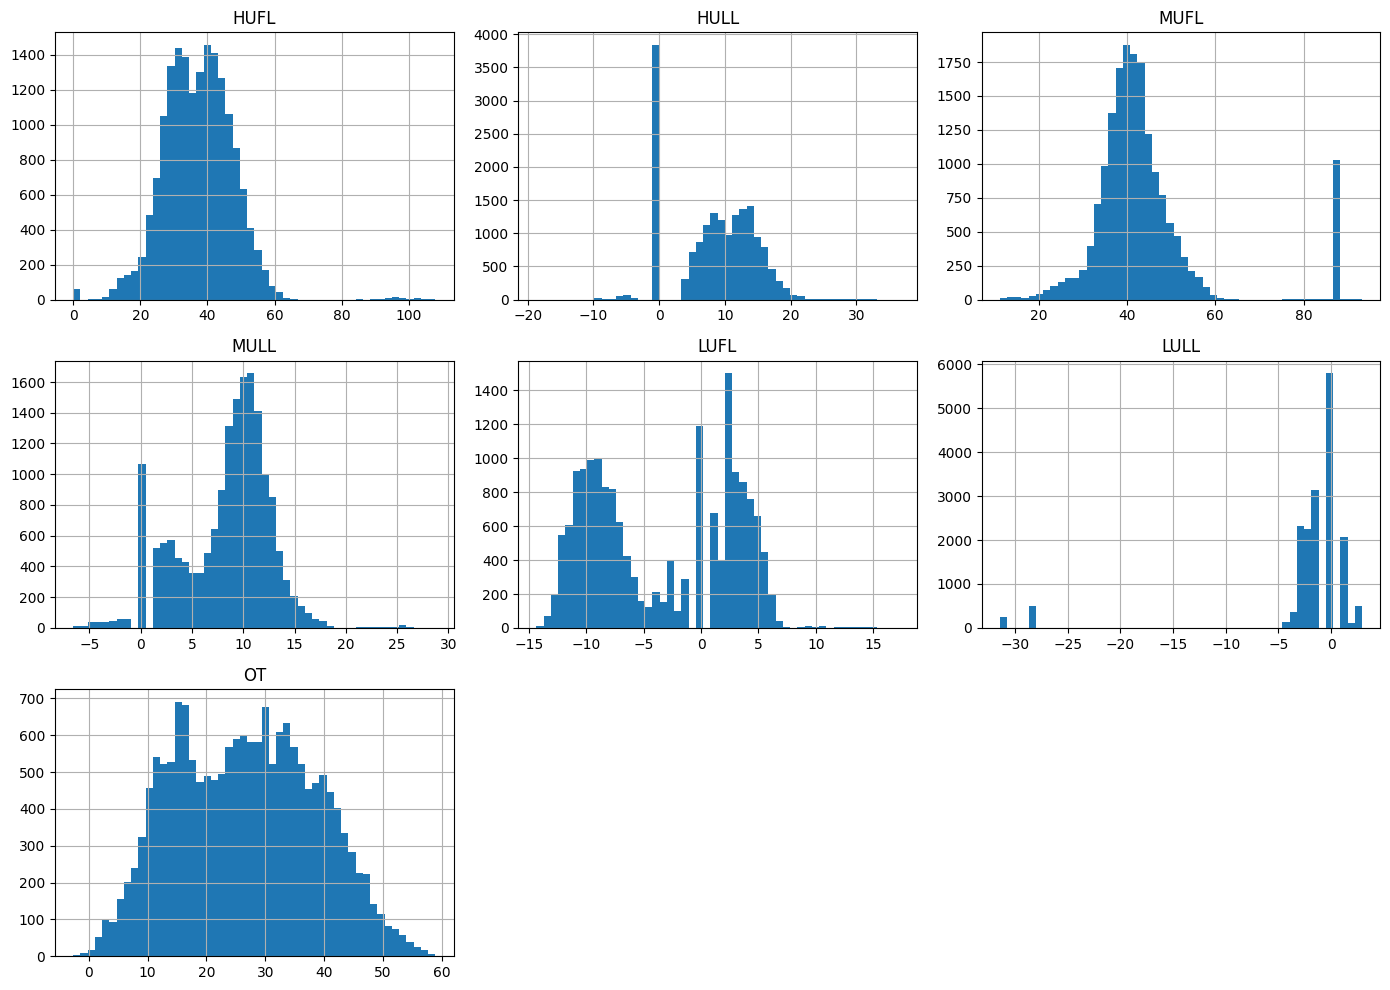

In [ ]:
# Visualize distributions using histograms
import matplotlib.pyplot as plt

# Setting the size of the plots
plt.figure(figsize=(14, 10))

# Plotting histograms for each column
data.drop("date", axis=1).hist(bins=50, figsize=(14,10))
plt.tight_layout()
plt.title("Distributions of time series")
plt.show()

Мы видим меньшую похожесть на нормальное распределение, существуют откровенно много данных по параметрам, равных нулю

In [ ]:
from scipy.stats import shapiro, kstest, anderson

for col in data.columns:
    if col == "date":
        continue

    # Shapiro-Wilk Test
    stat, p = shapiro(data[col])
    print(col)
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Kolmogorov-Smirnov Test
    stat, p = kstest(data[col], 'norm')
    print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Anderson-Darling Test
    result = anderson(data[col], dist='norm')
    print('Anderson-Darling Test: Statistic=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


    print("="*100)


HUFL
Shapiro-Wilk Test: Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=23.968
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
HULL
Shapiro-Wilk Test: Statistics=0.947, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.768, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=342.640
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
MUFL
Shapiro-Wilk Test: S

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: num must be an integer with 1 <= num <= 6, not 7

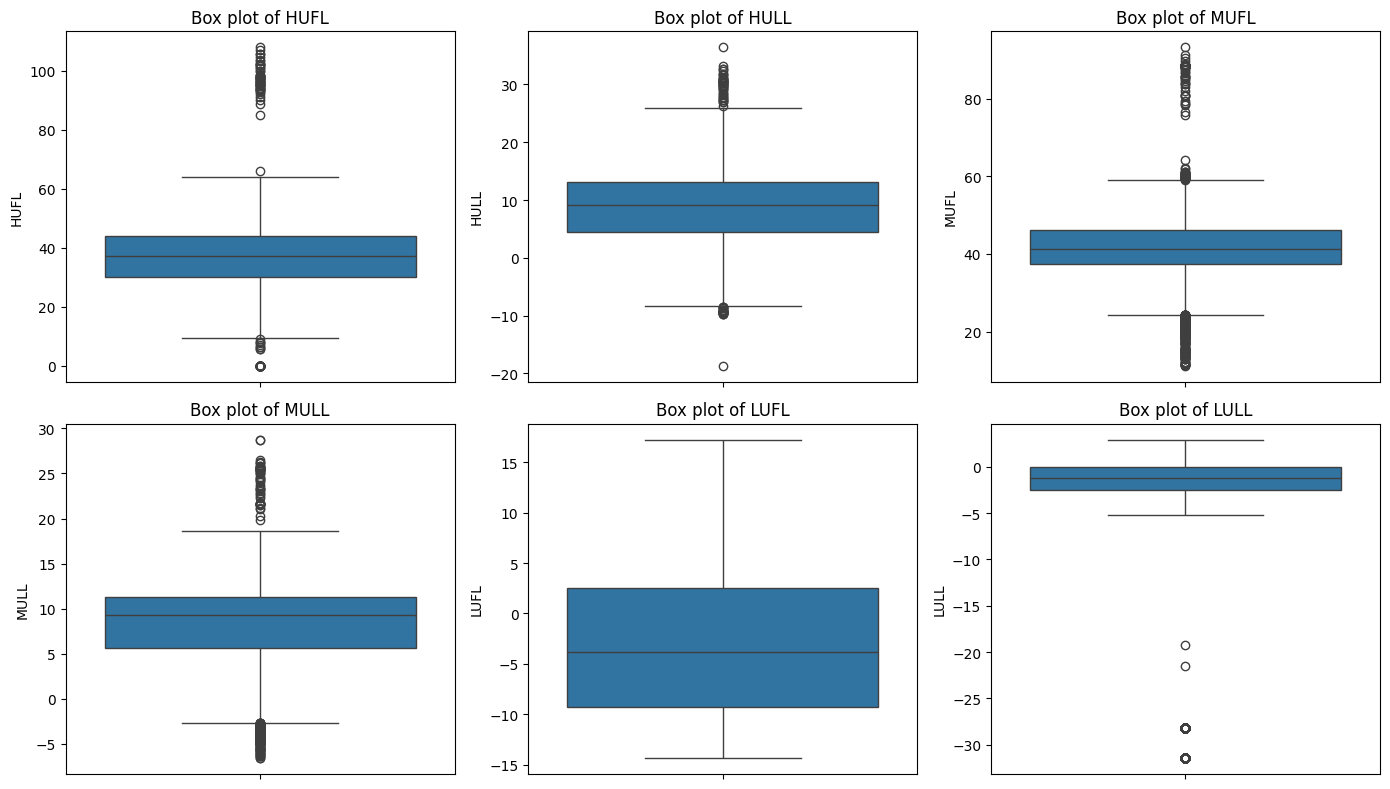

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
columns = [col for col in data.columns if col != "date"]
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

## Time Series Plots

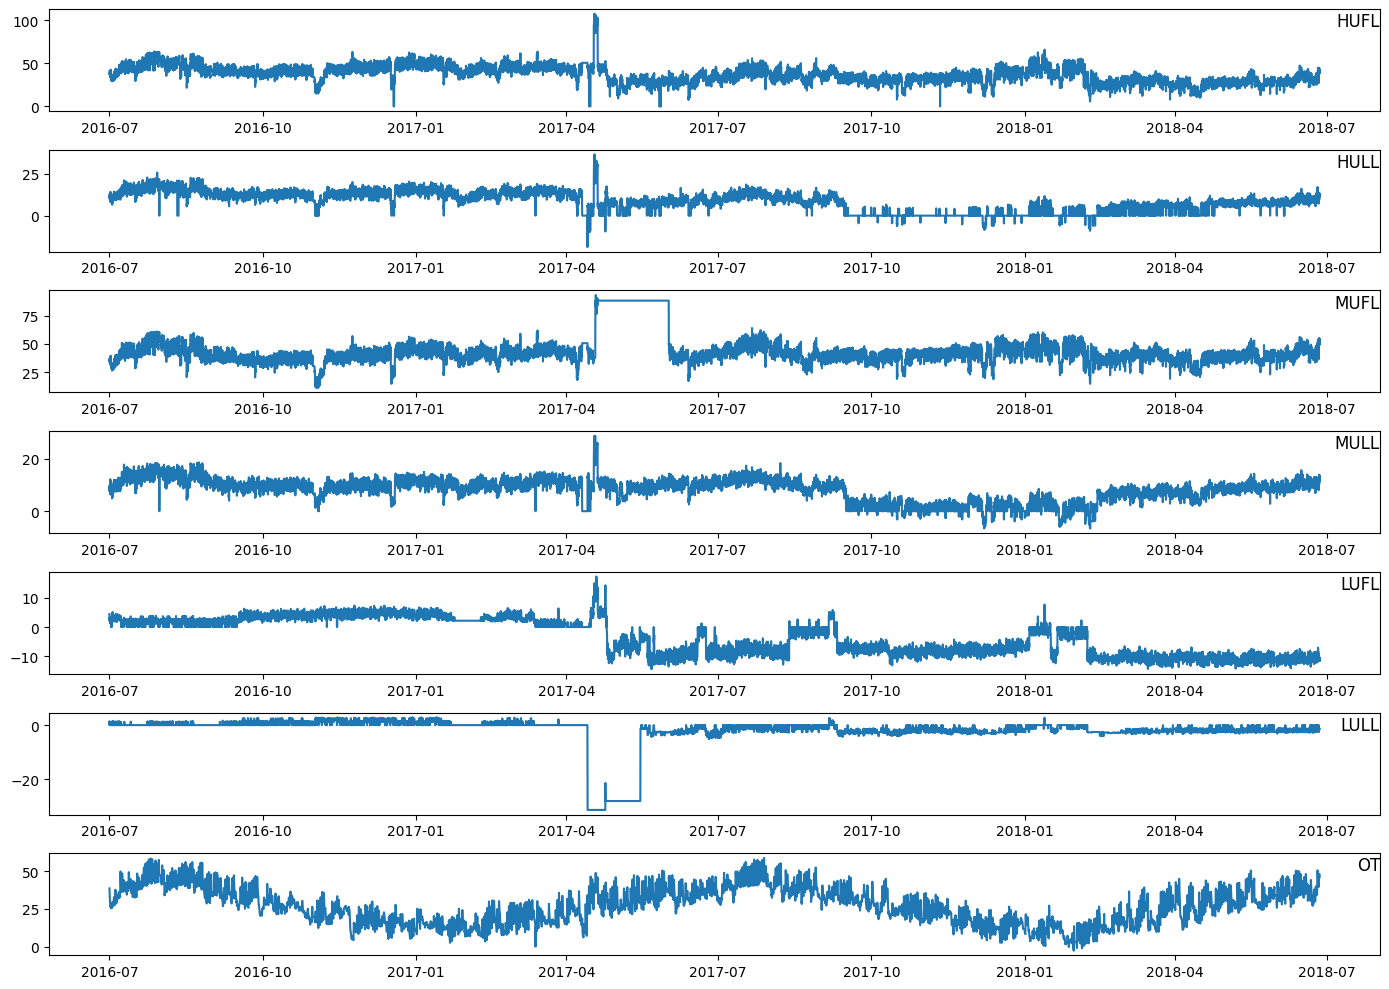

In [ ]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Setting the 'date' column as the index
data.set_index('date', inplace=True)

# Plotting the time series for each feature
plt.figure(figsize=(14, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column])
    plt.title(column, y=0.75, loc='right')
    plt.tight_layout()

plt.show()


**Consistency Across Features:**

* The spike around early 2017 is consistent across multiple features, indicating a potential external event or change in operations affecting all measurements.

**Anomalies and Data Issues:**

* The drop in LULL around early 2017 followed by a sudden increase suggests potential data recording issues or an anomaly in the data.
* Similar anomalies are seen in other features like MUFL and LUFL.

**Seasonality and Trends:**

* The features exhibit both seasonal patterns and long-term trends, similar to the 'OT' series observed earlier.
* The features in general are more stable,not so many noise

## Correlation Analysis

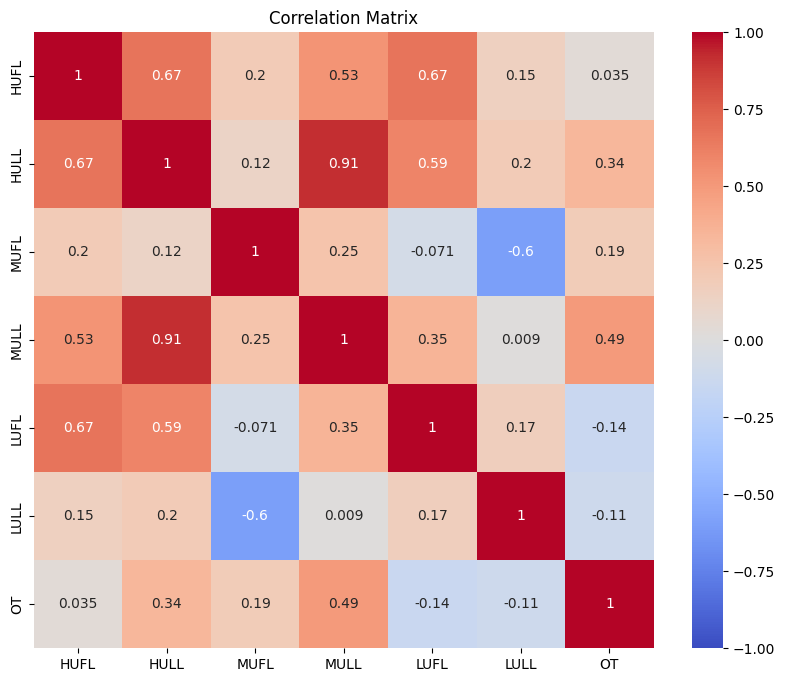

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**High Correlation Between Some Features:**

* HULL and MULL: Very high correlation (0.91), suggesting they might be influenced by similar factors or represent similar underlying processes.
* HUFL and LUFL: High correlation (0.67), indicating a strong relationship between high and low useful loads.

**Moderate Correlation with OT:**

* MULL and OT: Moderate positive correlation (0.49), suggesting that middle useless load might have some impact on oil temperature.
* HULL and OT: Moderate correlation (0.34), indicating some relationship between high useless load and oil temperature.

**Negative Correlations:**

* MUFL and LULL: Strong negative correlation (-0.6), suggesting an inverse relationship between middle useful load and low useless load.
* LUFL and OT: Slightly negative correlation (-0.14), indicating that low useful load might inversely affect oil temperature, but this is relatively weak.

## Missing values and outliers

In [ ]:
missing_values = pd.DataFrame(data.isnull().sum(), columns =["missing_values"]).T
missing_values

HUFL  HULL  MUFL  MULL  LUFL  LULL  OT
missing_values     0     0     0     0     0     0   0

There are no missing values in the dataset

In [ ]:
# Check for outliers using Z-scores
from scipy import stats

z_scores = stats.zscore(data)
outliers = (abs(z_scores) > 3).sum(axis=0)

pd.DataFrame(outliers, columns =["outliers"]).T

HUFL  HULL  MUFL  MULL  LUFL  LULL  OT
outliers   118    51  1046    96     7   761   0

less results for OT in emissions, but more in the MUFL type indicator

## Seasonality and Trend Analysis

The time series decomposition of the 'OT' (Oil Temperature) data shows the following components:

* Observed: The original time series data.
* Trend: A clear trend component indicating long-term movements in the data.
* Seasonal: A strong weekly seasonal pattern is observed, confirming periodic behavior.
* Residual: The noise or irregular component after removing the trend and seasonal components.

**Moving Averages**

The 7-day and 30-day moving averages help to smooth out short-term fluctuations and highlight longer-term trends in the 'OT' series.

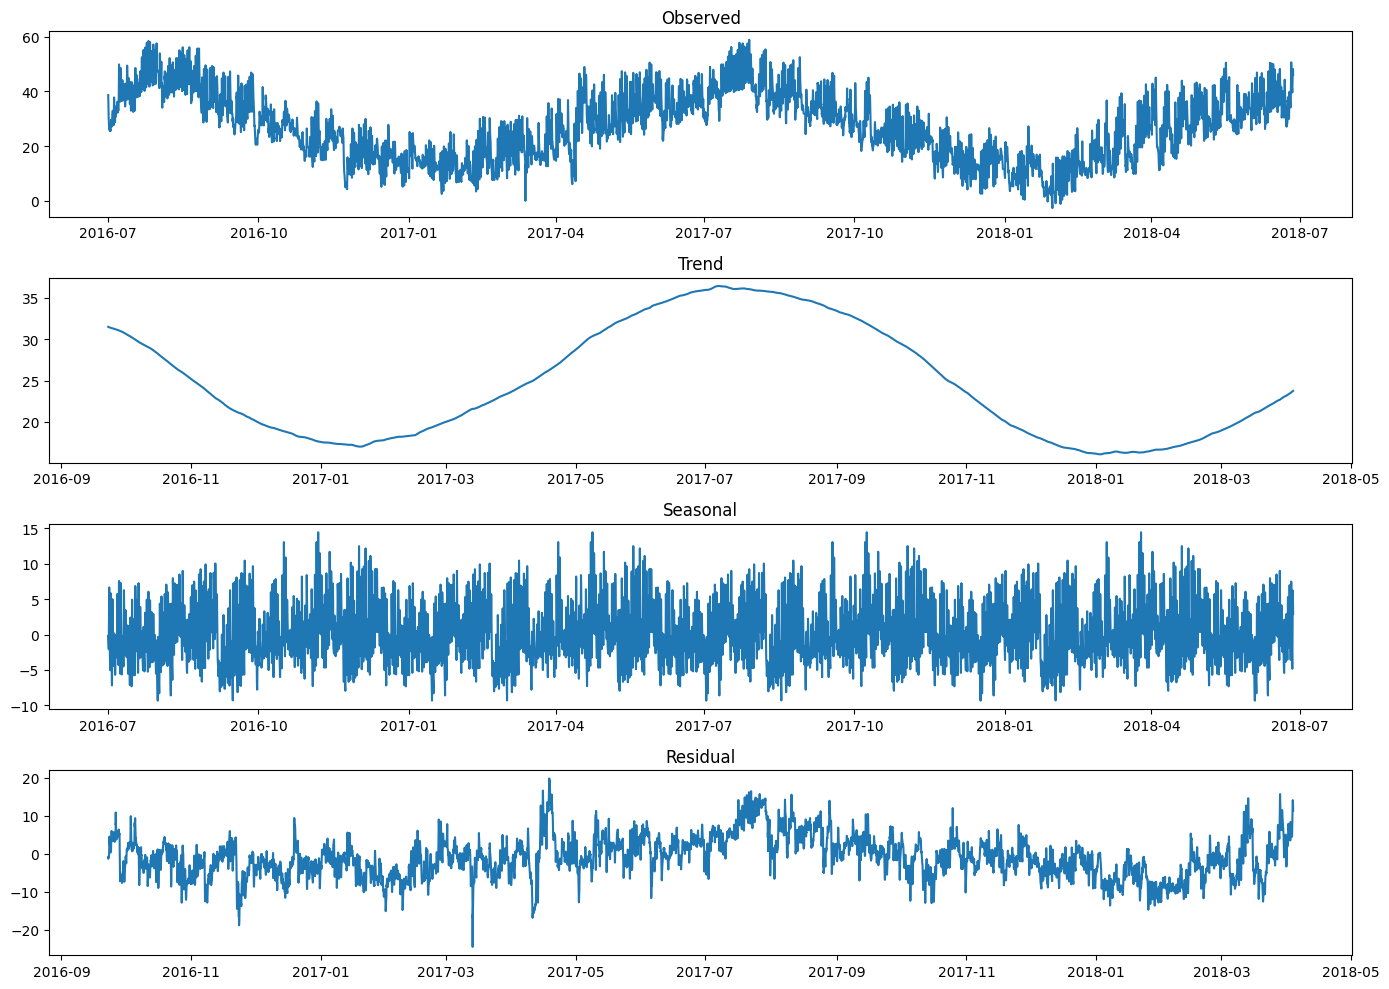

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'OT' time series
decomposition = seasonal_decompose(data['OT'], model='additive', period=24*7*12*2)  # Assuming daily data with weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


The trend component shows that the oil temperature decreased significantly from mid-2016 to early 2017 and then started to increase gradually.

The strong seasonal pattern indicates that the oil temperature exhibits regular fluctuations within each quarter.

The residuals show some irregular variations, but their behavior seems relatively stable over time.

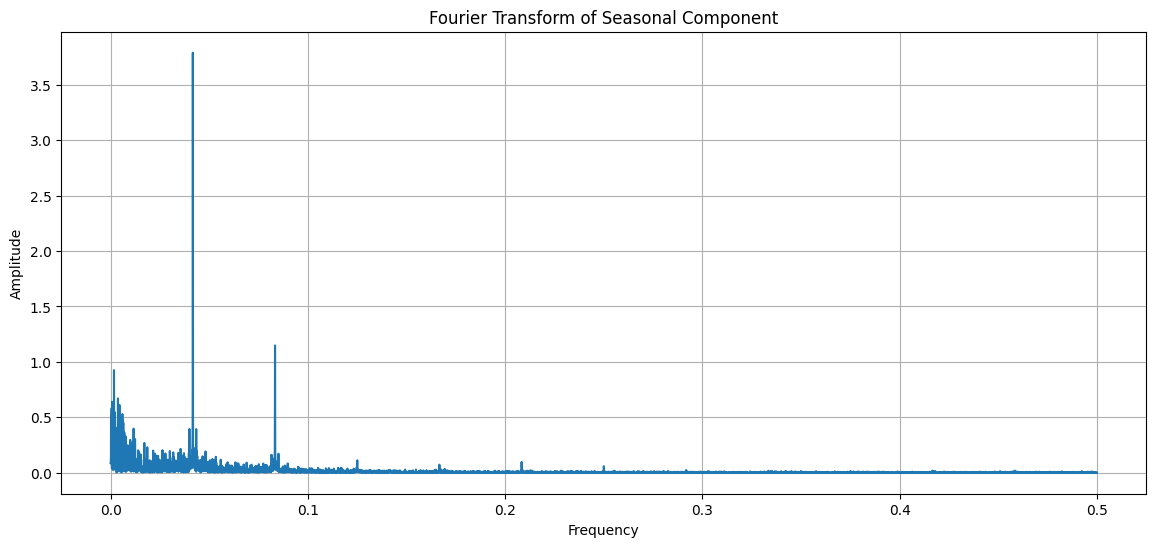

In [ ]:
from scipy.fft import fft

seasonal_component = decomposition.seasonal.dropna()
# Convert the seasonal component to a numpy array
seasonal_component_np = seasonal_component.to_numpy()

# Perform Fourier Transform on the seasonal component
fft_values = fft(seasonal_component_np)
fft_freqs = np.fft.fftfreq(len(seasonal_component_np))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_fft_values = 2.0/len(seasonal_component_np) * np.abs(fft_values[fft_freqs >= 0])

# Plot the Fourier Transform results
plt.figure(figsize=(14, 6))
plt.plot(positive_freqs, positive_fft_values)
plt.title('Fourier Transform of Seasonal Component')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**Dominant Frequencies:**

* The highest peak at the lowest frequency indicates a strong long-term seasonality.
* Additional peaks at higher frequencies represent shorter periodic cycles, such as daily or weekly patterns.

**Long-term Seasonality:**

* The significant peak at a very low frequency suggests the presence of long-term cycles, potentially quarterly or yearly.
* This confirms the presence of quarterly seasonality observed in the seasonal decomposition.


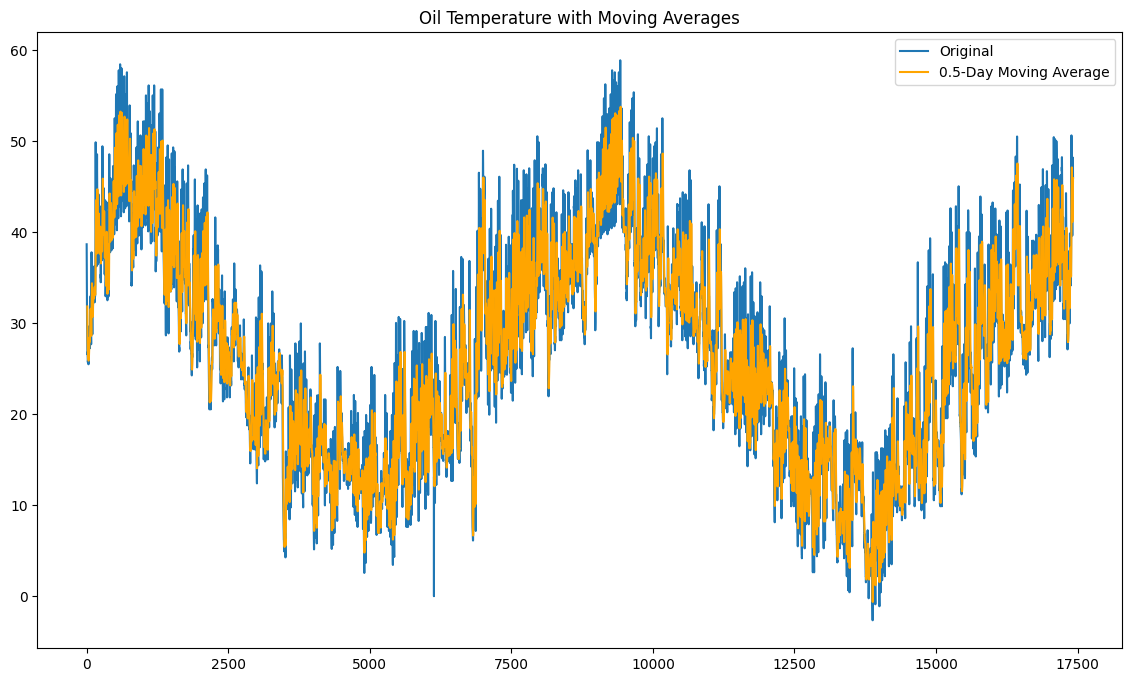

In [ ]:
data['OT_MA_05'] = data['OT'].rolling(window=12).mean()  # 12-hours moving average (168 hours)
data['OT_MA_1'] = data['OT'].rolling(window=24).mean()  # 1-day moving average (168 hours)
data['OT_MA_7'] = data['OT'].rolling(window=24*7).mean()  # 30-day moving average (720 hours)
data['OT_MA_30'] = data['OT'].rolling(window=24*30).mean()  # 30-day moving average (720 hours)

# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_05'], label='0.5-Day Moving Average', color='orange')
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

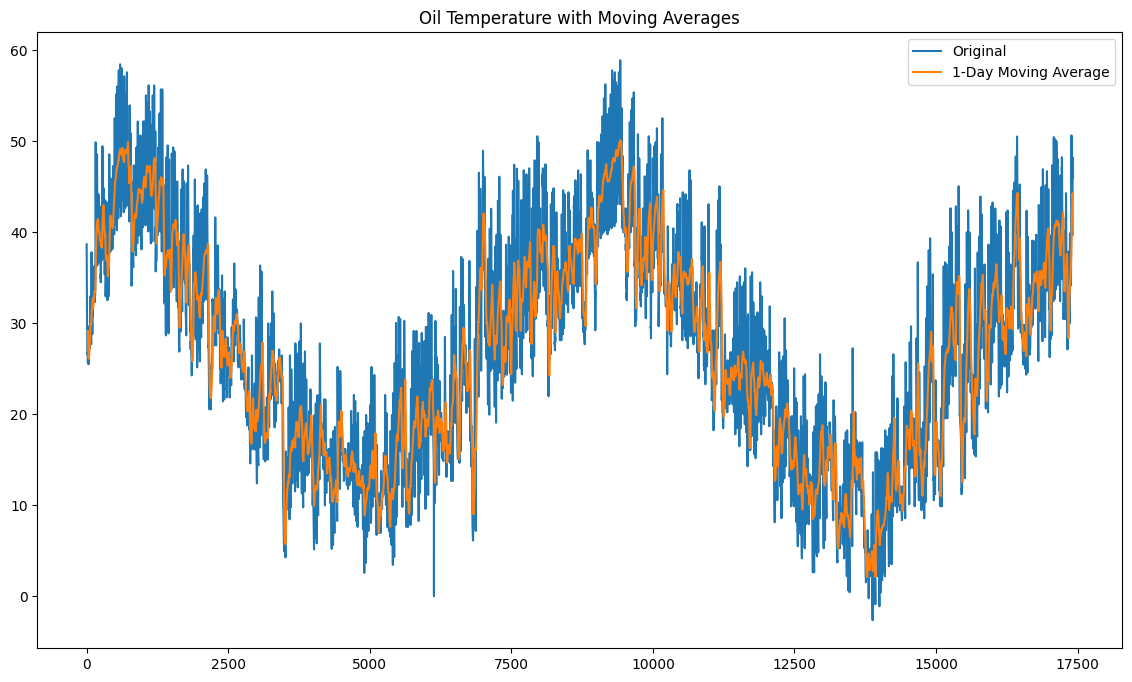

In [ ]:
# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_1'], label='1-Day Moving Average')
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

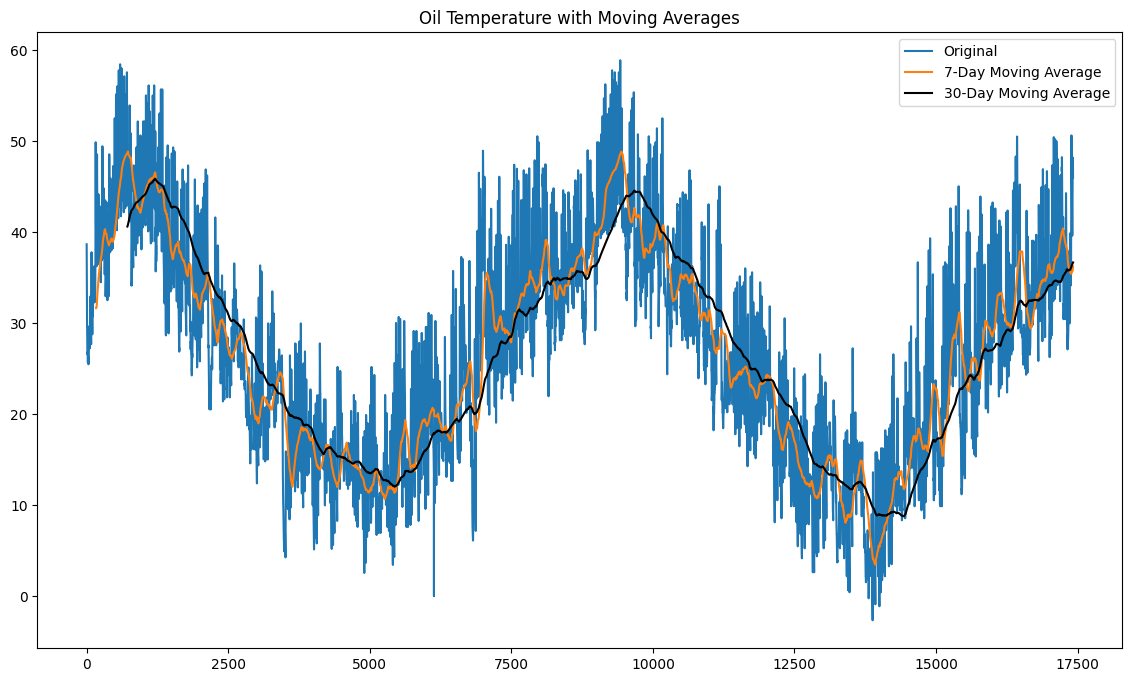

In [ ]:
# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['OT'], label='Original')
plt.plot(data['OT_MA_7'], label='7-Day Moving Average')
plt.plot(data['OT_MA_30'], label='30-Day Moving Average', color="black")
plt.title('Oil Temperature with Moving Averages')
plt.legend()
plt.show()

* **Seasonality and Trend:** The 'OT' series exhibits a clear trend and strong day and week seasonality, moving averages smooth out short-term fluctuations and highlight longer-term trends.

* however the month seasonality is not clear reveal, it captured the whole picture without details


## Autocorrelation Analysis

**Autocorrelation Function (ACF)**

The ACF plot for the 'OT' series shows significant autocorrelations at multiple lags, indicating that the series is not white noise and exhibits dependencies over time. The presence of significant lags suggests seasonality.


**Partial Autocorrelation Function (PACF)**

The PACF plot indicates the partial correlation of the series with its own lags. The first few lags show significant partial autocorrelations, which will help in identifying the order of the AR component in the ARIMA model.

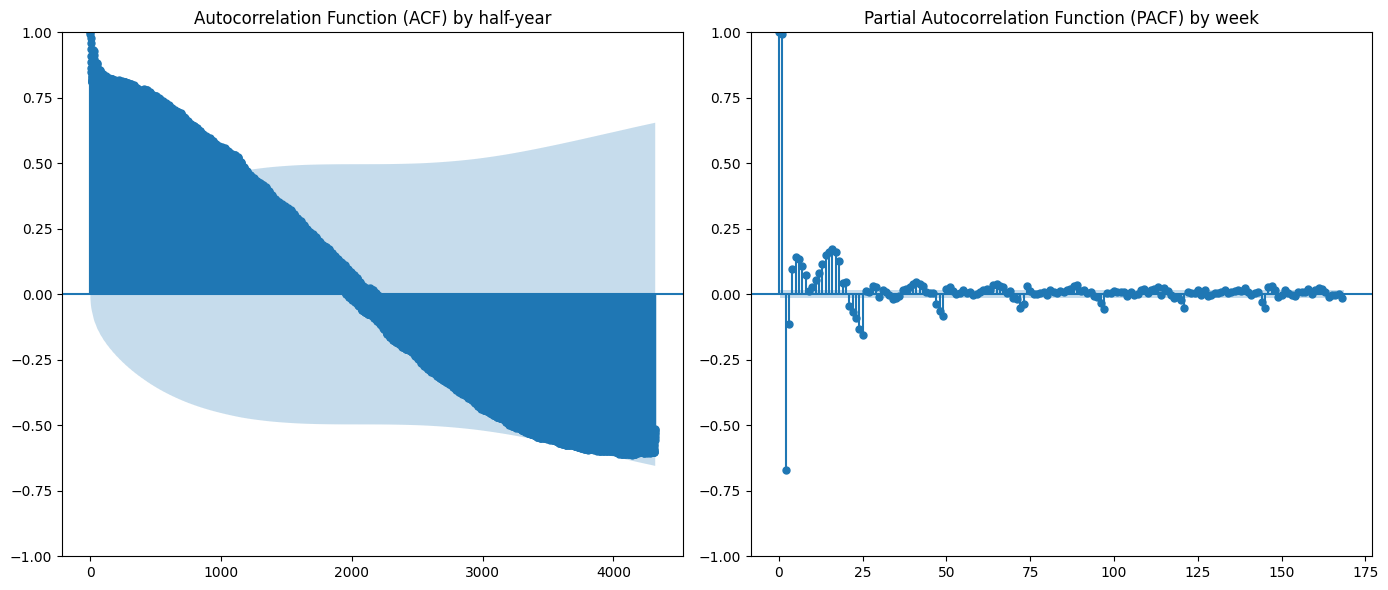

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for 'OT'
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(data['OT'], lags=24*30*6, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) by half-year')

plt.subplot(122)
plot_pacf(data['OT'], lags=24*7, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) by week')

plt.tight_layout()
plt.show()

ACF Plot:

Shows strong persistence and long-term trends in the time series.
Significant autocorrelation at multiple lags, indicating past values influence future values over long periods.

PACF Plot:

Highlights the significance of the immediate past value.
Subsequent lags have much less influence once the immediate past value is accounted for.

Confidence Intervals:

The light blue area represents the 95% confidence interval.
Autocorrelation and partial autocorrelation values outside this area are statistically significant.

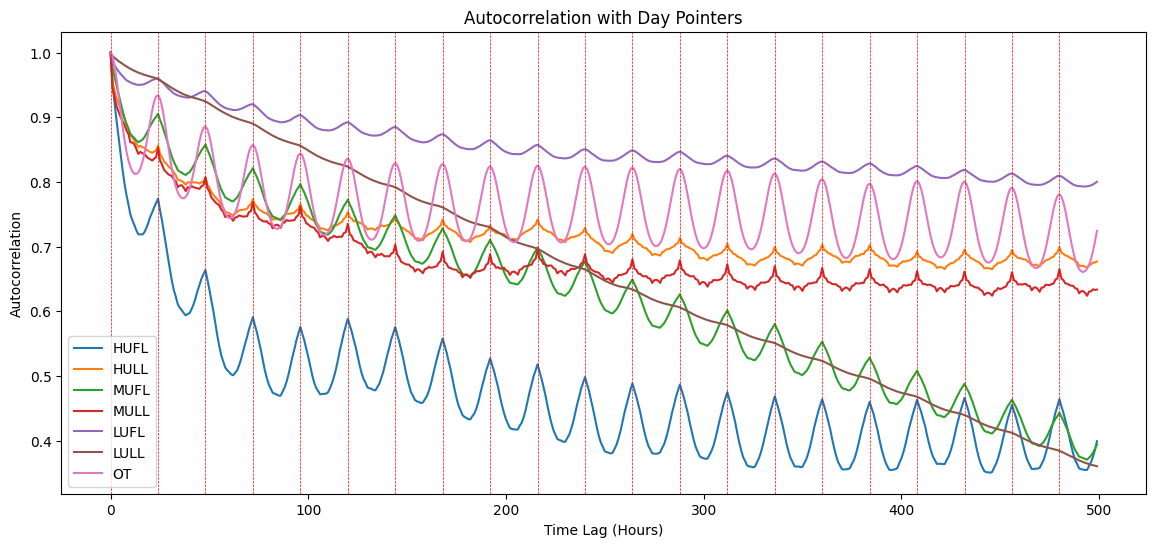

In [ ]:
lags = 500

plt.figure(figsize=(14, 6))
for column in data.columns:
    if column != "date":
        autocorrelations = [data[column].autocorr(lag) for lag in range(lags)]
        plt.plot(range(lags), autocorrelations, label=column)

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 24):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation with Day Pointers')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

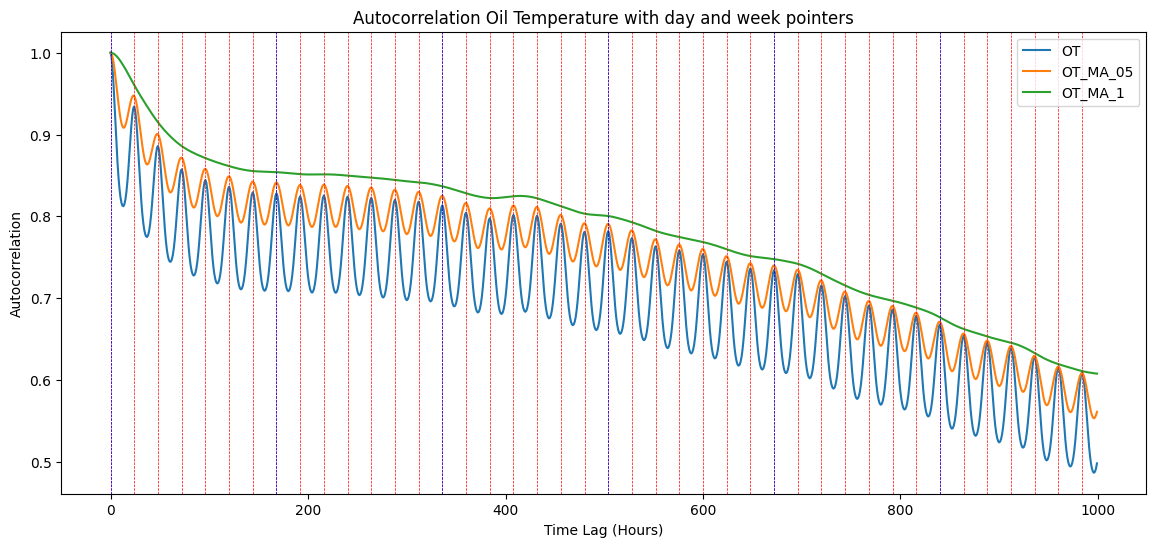

In [ ]:
lags = 1000

plt.figure(figsize=(14, 6))
autocorrelations = [data["OT"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT")
autocorrelations = [data["OT_MA_05"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT_MA_05")
autocorrelations = [data["OT_MA_1"].autocorr(lag) for lag in range(lags)]
plt.plot(range(lags), autocorrelations, label="OT_MA_1")

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 24):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)
for day in range(0, lags, 168):
    plt.axvline(x=day, color='blue', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation Oil Temperature with day and week pointers')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

* The autocorrelation values show a gradual decline, indicating a strong correlation with past values.
* The periodic spikes suggest the presence of seasonality.

1. Daily Cycles:

  * The vertical lines at every 24-hour interval clearly highlight the daily cycles in the data.
  * Several features exhibit significant autocorrelation at these daily intervals, confirming strong daily periodicity.

2. Weekly and Longer-Term Patterns:

  * Peaks at 168-hour intervals (7 days, blue lines) suggest weekly cycles, particularly for certain features like HUFL, HULL, MUFL, MULL, LUFL, and LULL.
  * The periodicity is consistent across different features, indicating regular weekly patterns.

3. Comparison Across Features:

  * Different features show varying levels of autocorrelation, but the periodic nature is evident in all.
  * OT (Oil Temperature) shows a strong daily and weekly pattern, but its autocorrelation values are lower compared to some other features.


To understand the influence of external factors on the observed periodic patterns, we can perform a regression analysis. This will help us quantify the impact of external variables on the Oil Temperature (OT) and other features.

## Autocorrelation analysis based on minutes

In [ ]:
# Load the dataset
data_m = pd.read_csv('https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTm2.csv',
                 parse_dates=['date'])

# Display the first few rows of the dataset
data_m.head()

date       HUFL    HULL       MUFL   MULL   LUFL   LULL  \
0 2016-07-01 00:00:00  41.130001  12.481  36.535999  9.355  4.424  1.311   
1 2016-07-01 00:15:00  39.622002  11.309  35.543999  8.551  3.209  1.258   
2 2016-07-01 00:30:00  38.868000  10.555  34.365002  7.586  4.435  1.258   
3 2016-07-01 00:45:00  35.518002   9.214  32.569000  8.712  4.435  1.215   
4 2016-07-01 01:00:00  37.528000  10.136  33.936001  7.532  4.435  1.215   

          OT  
0  38.661999  
1  38.223000  
2  37.344002  
3  37.124001  
4  37.124001

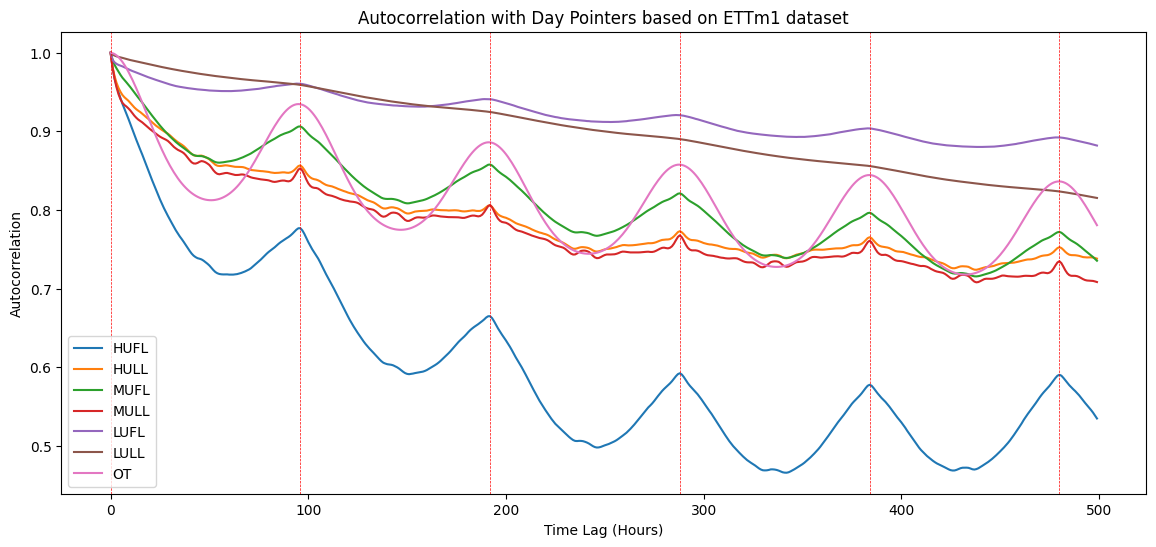

In [ ]:
lags = 500

plt.figure(figsize=(14, 6))
for column in data_m.columns:
    if column != "date":
        autocorrelations = [data_m[column].autocorr(lag) for lag in range(lags)]
        plt.plot(range(lags), autocorrelations, label=column)

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 96):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation with Day Pointers based on ETTm1 dataset')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

It is clear that HULL and MULL have a strong correlation

## Regression Analysis Summary

In [ ]:
import numpy as np
import statsmodels.api as sm

# Define the target and features
X = data.drop("OT", axis=1)
y = data['OT']

# Add a constant term for the regression intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     OT   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1704.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:49:08   Log-Likelihood:                -63818.
No. Observations:               17420   AIC:                         1.277e+05
Df Residuals:                   17413   BIC:                         1.277e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8962      0.418     33.262      0.000      13.077      14.715
HUFL          -0.1111      0.011     -9.773      0.000      -0.133      -0.089
HULL          -0.1664      0.049     -3.376      0.001      -0.263      -0.070
MUFL          -0.0029      0.008     -0.376      0.707      -0.018       0.012
MULL           1.9669      0.057     34.490      0.000       1.855       2.079
LUFL          -0.5401      0.020    -26.490      0.000      -0.580      -0.500
LULL          -0.0833      0.018     -4.736      0.000      -0.118      -0.049
==============================================================================
Omnibus:                      403.068   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.609
Skew:                          -0.030   Prob(JB):                     3.05e-46
Kurtosis:                       2.466   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model explains 37% of the variance in the 'OT' variable

## Residual Analysis

### normality check

In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Extract residuals
residuals = model.resid

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)

# Perform Durbin-Watson test for autocorrelation
durbin_watson_test = durbin_watson(residuals)

shapiro_test, durbin_watson_test


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9936569929122925, pvalue=8.546098424064588e-27),
 0.08157901117098308)

The Shapiro-Wilk test indicates that the residuals do not follow a normal distribution (p-value < 0.05). The residuals exhibit significant autocorrelation, suggesting that the model has not fully captured the time-dependent structure in the data.

The Durbin-Watson statistic is close to 0, indicating strong positive autocorrelation in the residuals. The non-normality of residuals further indicates that there may be other factors or nonlinear relationships that the current model does not account for.

## stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(data['OT'])

# Extract the test statistics
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

(adf_statistic, p_value, critical_values)

(-3.5971318743339555,
 0.005816097489277829,
 {'1%': -3.4307263748778603,
  '5%': -2.861706343084998,
  '10%': -2.5668585401191493})

The ADF test statistic (-3.59) is less than the critical values at all significance levels (1%, 5%, and 10%). Additionally, the p-value (0.0058) is less than 0.05. Therefore, we reject the null hypothesis that the series has a unit root, indicating that the 'OT' series is stationary.

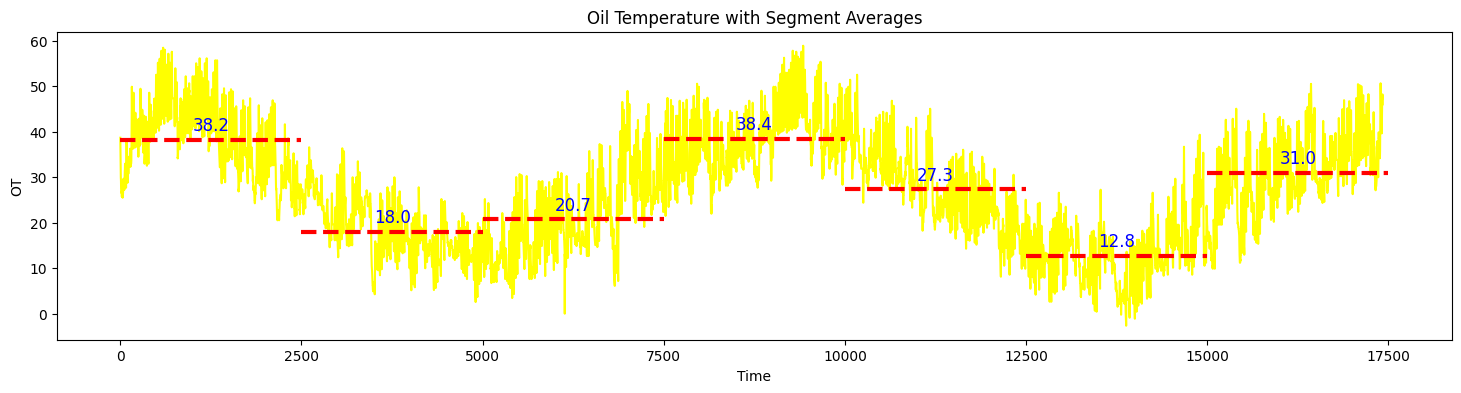

In [ ]:
import matplotlib.pyplot as plt

# Define segments and calculate average values for each segment
segment_indices = [(0, 2500), (2500, 5000), (5000, 7500), (7500, 10000), (10000, 12500), (12500, 15000), (15000, 17500)]
segment_averages = [(start, end, data['OT'][start:end].mean()) for start, end in segment_indices]

# Plot the 'OT' series with segment averages
plt.figure(figsize=(18, 4))
plt.plot(data['OT'].values, color="yellow")

# Add horizontal lines and labels for each segment
for start, end, avg in segment_averages:
    medium = (start + end) / 2
    plt.hlines(y=avg, xmin=start, xmax=end, colors='red', linestyles='dashed', linewidth=3)
    plt.text(medium, avg + 2, f'{avg:.1f}', color='blue', fontsize=12, ha='center')

plt.xlabel('Time')
plt.ylabel('OT')
plt.title('Oil Temperature with Segment Averages')
plt.show()


The mean is not equal during the time

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

target_col = "Daily_Deaths"
data = data[[target_col]]

# Split the data into training and testing sets
train_data = data[:int(len(data) * 0.8)]
test_data = data[int(len(data) * 0.8):]

test_data

# Function to evaluate ARIMA model
def evaluate_arima(train, test, order, forecast_horizon):
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast(steps=forecast_horizon)
        yhat = output[-1]
        predictions.append(yhat)
        history.append(test.iloc[t])
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    return mse, mae, predictions

# Evaluate ARIMA models for 7, 15, and 30-point forecasts
results = {}
for horizon in [96]:
    mse, mae, predictions = evaluate_arima(train_data[target_col], test_data[target_col], (5,1,0), horizon)
    results[horizon] = {'MSE': mse, 'MAE': mae, 'predictions': predictions}

# Display the results
for horizon in results:
    print(f'Forecast Horizon: {horizon} points')
    print(f'MSE: {results[horizon]["MSE"]}')
    print(f'MAE: {results[horizon]["MAE"]}')
    print('---')

# Covid19 Dataset

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

# Display the first few rows of the dataset
data.tail()

Date Country/Region Province/State  Confirmed  Recovered  Deaths
231739 2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740 2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741 2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742 2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743 2022-04-16       Zimbabwe            NaN     247237        0.0    5462

In [ ]:
len(data["Country/Region"].unique())

198

In [ ]:
data = data[data["Country/Region"]=="US"]

In [ ]:
data = data[data["Country/Region"]=="Russia"]

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date if not already sorted
data = data.sort_values(by='Date')

# Calculate daily new cases
data['Daily_Confirmed'] = data['Confirmed'].diff().fillna(0)
data['Daily_Recovered'] = data['Recovered'].diff().fillna(0)
data['Daily_Deaths'] = data['Deaths'].diff().fillna(0)

In [ ]:
data = data[["Date", "Daily_Confirmed", "Daily_Recovered", "Daily_Deaths"]]

In [ ]:
# Display the first few rows of the new dataset
data.tail()

Date  Daily_Confirmed  Daily_Recovered  Daily_Deaths
178699 2022-04-12          10730.0              0.0         273.0
178700 2022-04-13          11577.0              0.0         259.0
178701 2022-04-14          11168.0              0.0         247.0
178702 2022-04-15          11283.0              0.0         255.0
178703 2022-04-16          10892.0              0.0         234.0

## descriptive statistics

In [ ]:
# Descriptive statistics
descriptive_stats = data.drop("Date", axis=1).describe().round(2)
descriptive_stats

Daily_Confirmed  Daily_Recovered  Daily_Deaths
count           816.00           816.00        816.00
mean          21815.08             0.00        448.25
std           30529.10        196783.76        334.76
min               0.00      -5609682.00          0.00
25%            7792.25             0.00        145.75
50%           14803.50          5121.50        393.00
75%           24387.00         10268.50        723.00
max          202211.00         29084.00       1222.00

In [ ]:
# Descriptive statistics
descriptive_stats = data.drop("Date", axis=1).describe().round(2)
descriptive_stats

Daily_Confirmed  Daily_Recovered  Daily_Deaths
count           816.00           816.00        816.00
mean          98805.29             0.00       1211.53
std          144468.10        221459.89        986.76
min               0.00      -6298082.00          0.00
25%           27636.50             0.00        457.75
50%           54332.00             0.00        958.00
75%          116974.50          6725.00       1773.25
max         1383795.00        150267.00       4431.00

## Data Visualization

<Figure size 1400x1000 with 0 Axes>

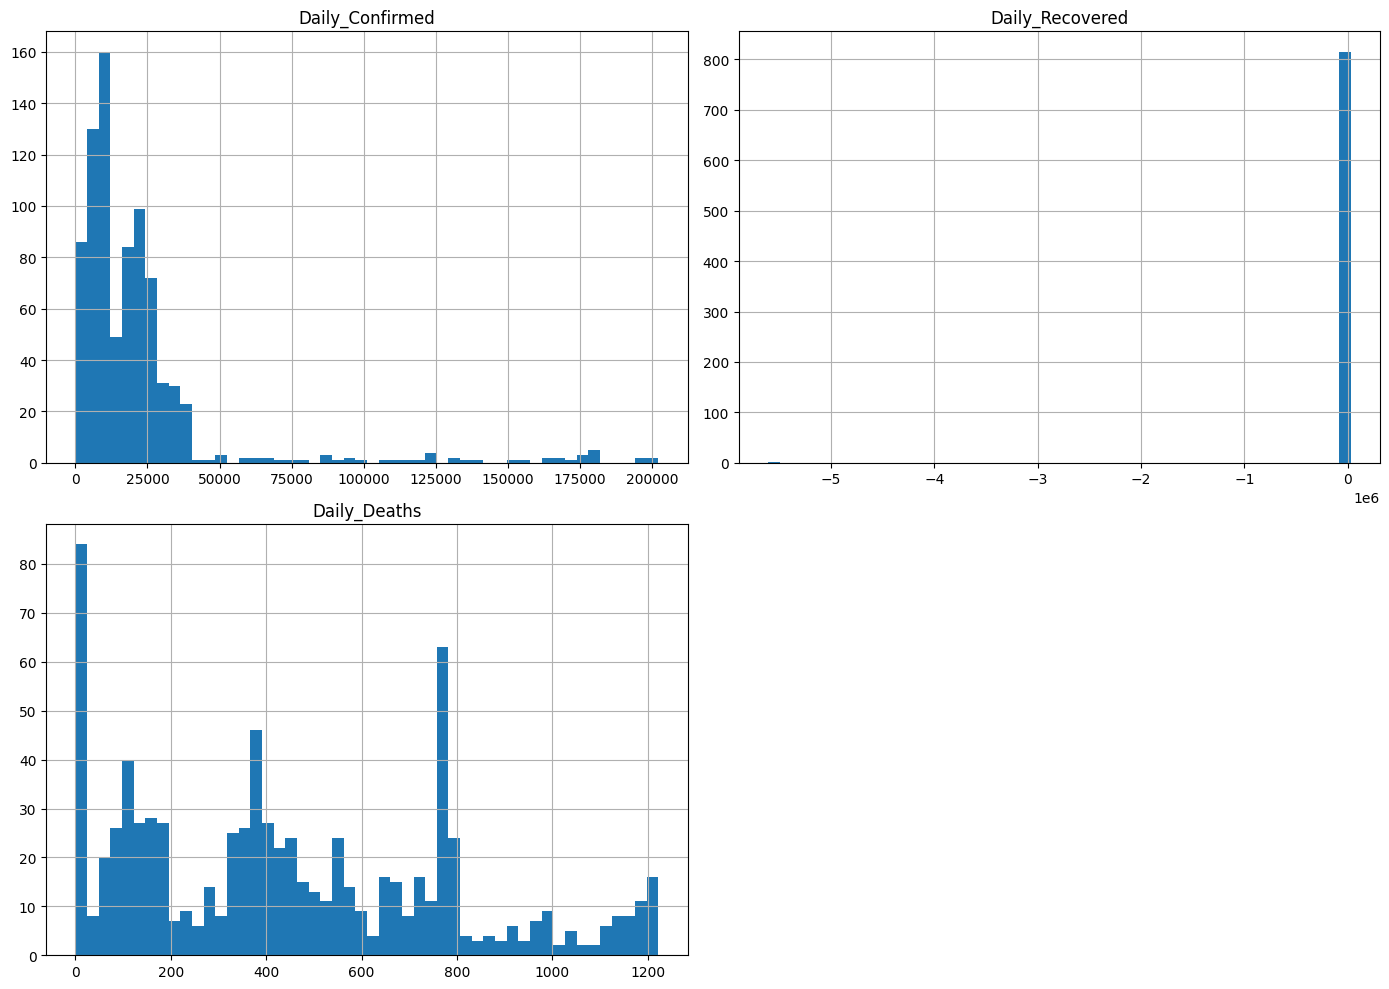

In [ ]:
# Visualize distributions using histograms
import matplotlib.pyplot as plt

# Setting the size of the plots
plt.figure(figsize=(14, 10))

# Plotting histograms for each column
data.drop("Date", axis=1).hist(bins=50, figsize=(14,10))
plt.tight_layout()
plt.title("Distributions of time series")
plt.show()

Мы видим меньшую похожесть на нормальное распределение, существуют откровенно много данных по параметрам, равных нулю

In [ ]:
from scipy.stats import shapiro, kstest, anderson

for col in data.columns:
    if col == "date":
        continue

    # Shapiro-Wilk Test
    stat, p = shapiro(data[col])
    print(col)
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Kolmogorov-Smirnov Test
    stat, p = kstest(data[col], 'norm')
    print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

    # Anderson-Darling Test
    result = anderson(data[col], dist='norm')
    print('Anderson-Darling Test: Statistic=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


    print("="*100)


Daily_Confirmed
Shapiro-Wilk Test: Statistics=0.569, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=91.771
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Daily_Recovered
Shapiro-Wilk Test: Statistics=0.031, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.496, p=0.000
Sample does not look Gaussian (reject H0)
Anderson-Darling Test: Statistic=280.229
15.000: 0.573, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.783, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.087, data does not look normal (reject H0)
Dai

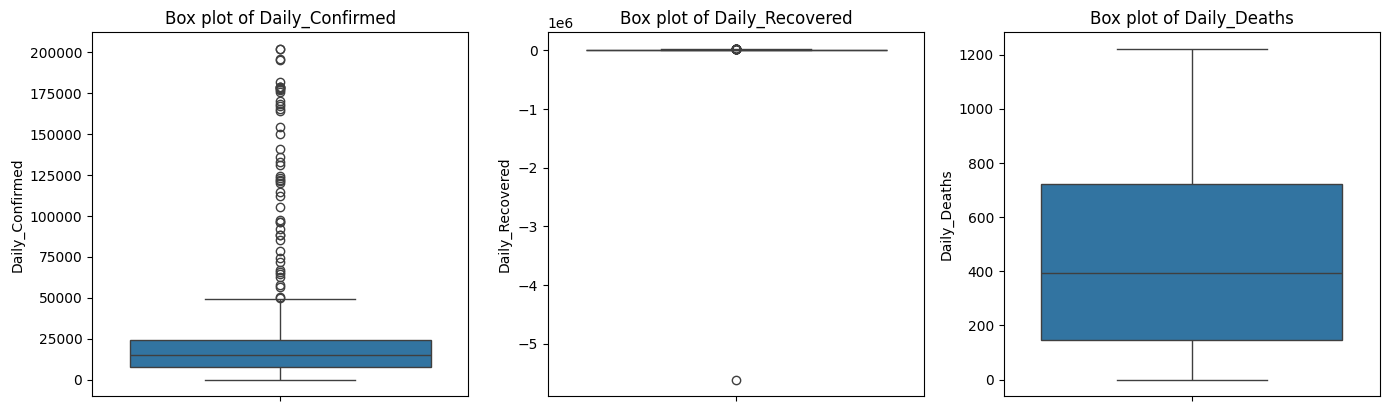

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
columns = [col for col in data.columns if col != "Date"]
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

## Time Series Plots

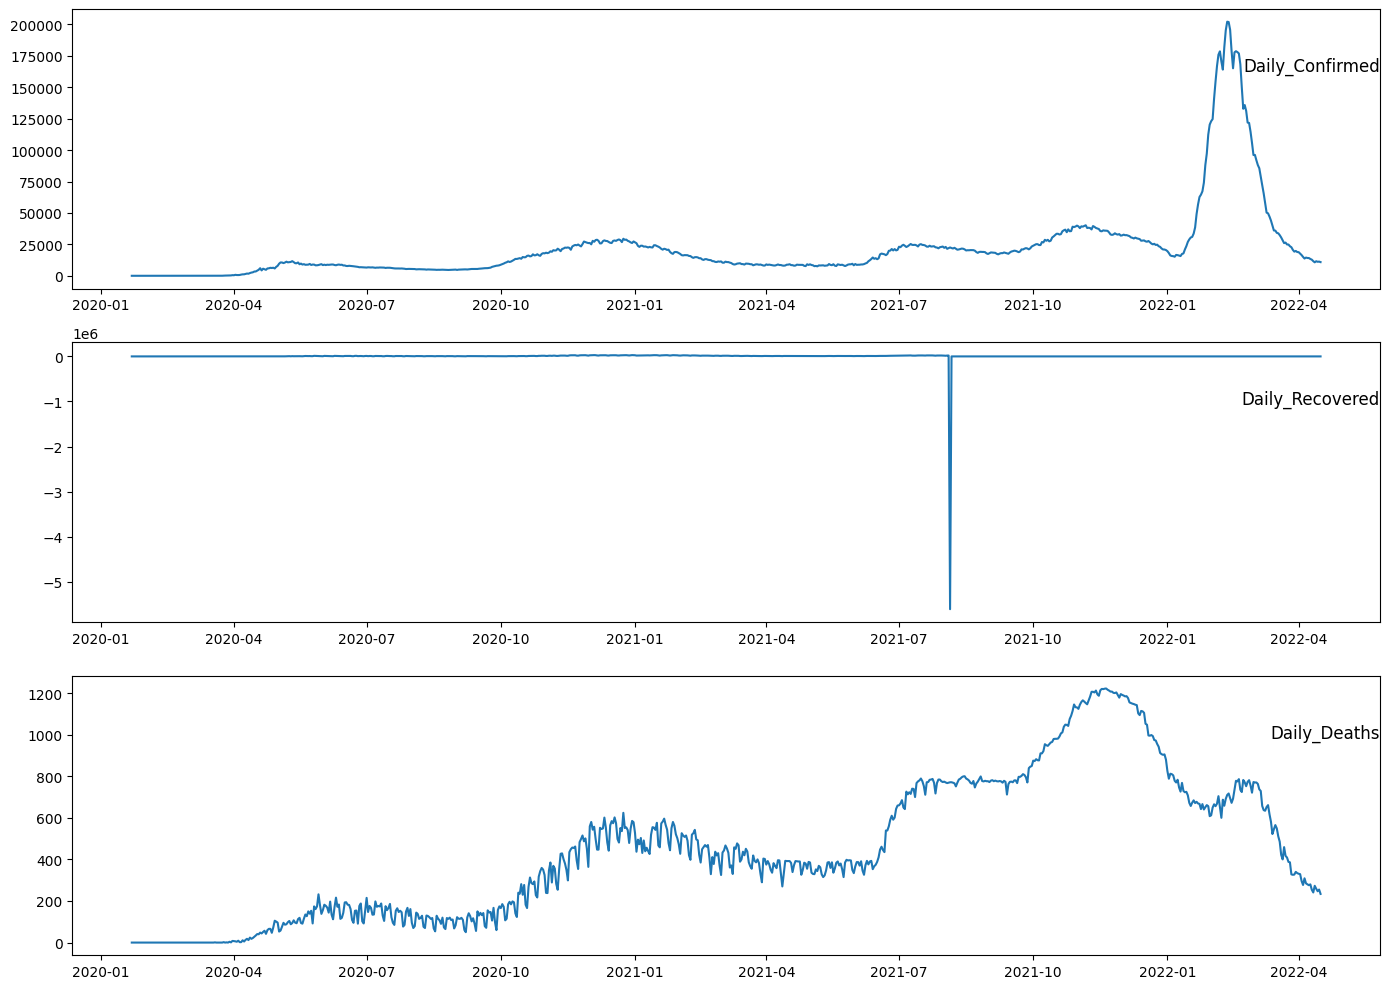

In [ ]:
# Setting the 'date' column as the index
data.set_index('Date', inplace=True)

# Plotting the time series for each feature
plt.figure(figsize=(14, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column])
    plt.title(column, y=0.75, loc='right')
    plt.tight_layout()

plt.show()


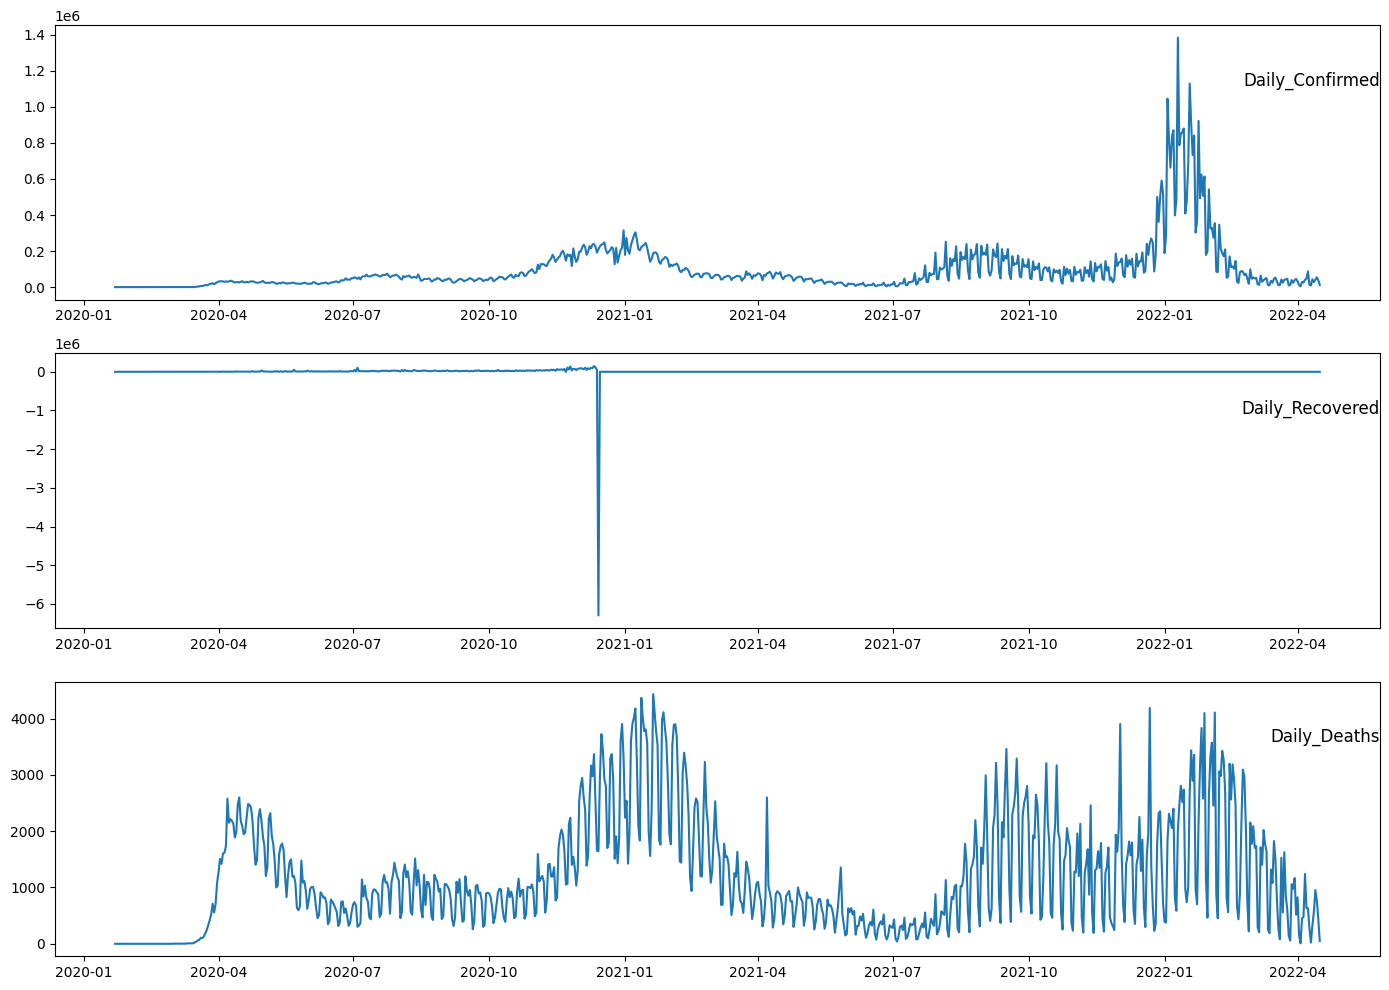

In [ ]:
# Setting the 'date' column as the index
data.set_index('Date', inplace=True)

# Plotting the time series for each feature
plt.figure(figsize=(14, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column])
    plt.title(column, y=0.75, loc='right')
    plt.tight_layout()

plt.show()

In [ ]:
data = data[["Daily_Confirmed", "Daily_Deaths"]]

## Correlation Analysis

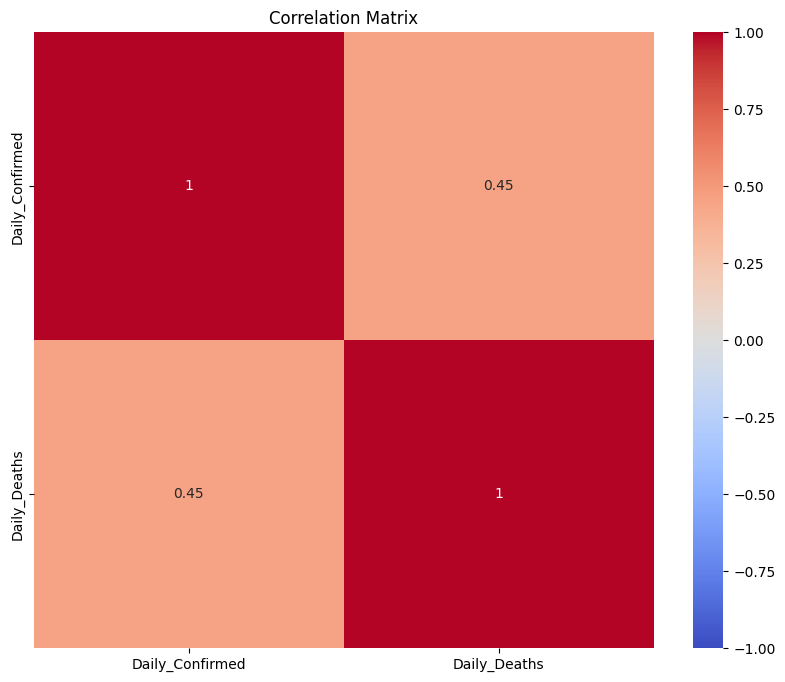

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## Missing values and outliers

In [ ]:
missing_values = pd.DataFrame(data.isnull().sum(), columns =["missing_values"]).T
missing_values

Daily_Confirmed  Daily_Deaths
missing_values                0             0

There are no missing values in the dataset

In [ ]:
# Check for outliers using Z-scores
from scipy import stats

z_scores = stats.zscore(data)
outliers = (abs(z_scores) > 3).sum(axis=0)

pd.DataFrame(outliers, columns =["outliers"]).T

Daily_Confirmed  Daily_Deaths
outliers               29             0

less results for OT in emissions, but more in the MUFL type indicator

## Seasonality and Trend Analysis

The time series decomposition of the 'OT' (Oil Temperature) data shows the following components:

* Observed: The original time series data.
* Trend: A clear trend component indicating long-term movements in the data.
* Seasonal: A strong weekly seasonal pattern is observed, confirming periodic behavior.
* Residual: The noise or irregular component after removing the trend and seasonal components.

**Moving Averages**

The 0.5-day, 1-day, 7-day and 30-day moving averages help to smooth out short-term fluctuations and highlight longer-term trends in the 'OT' series.

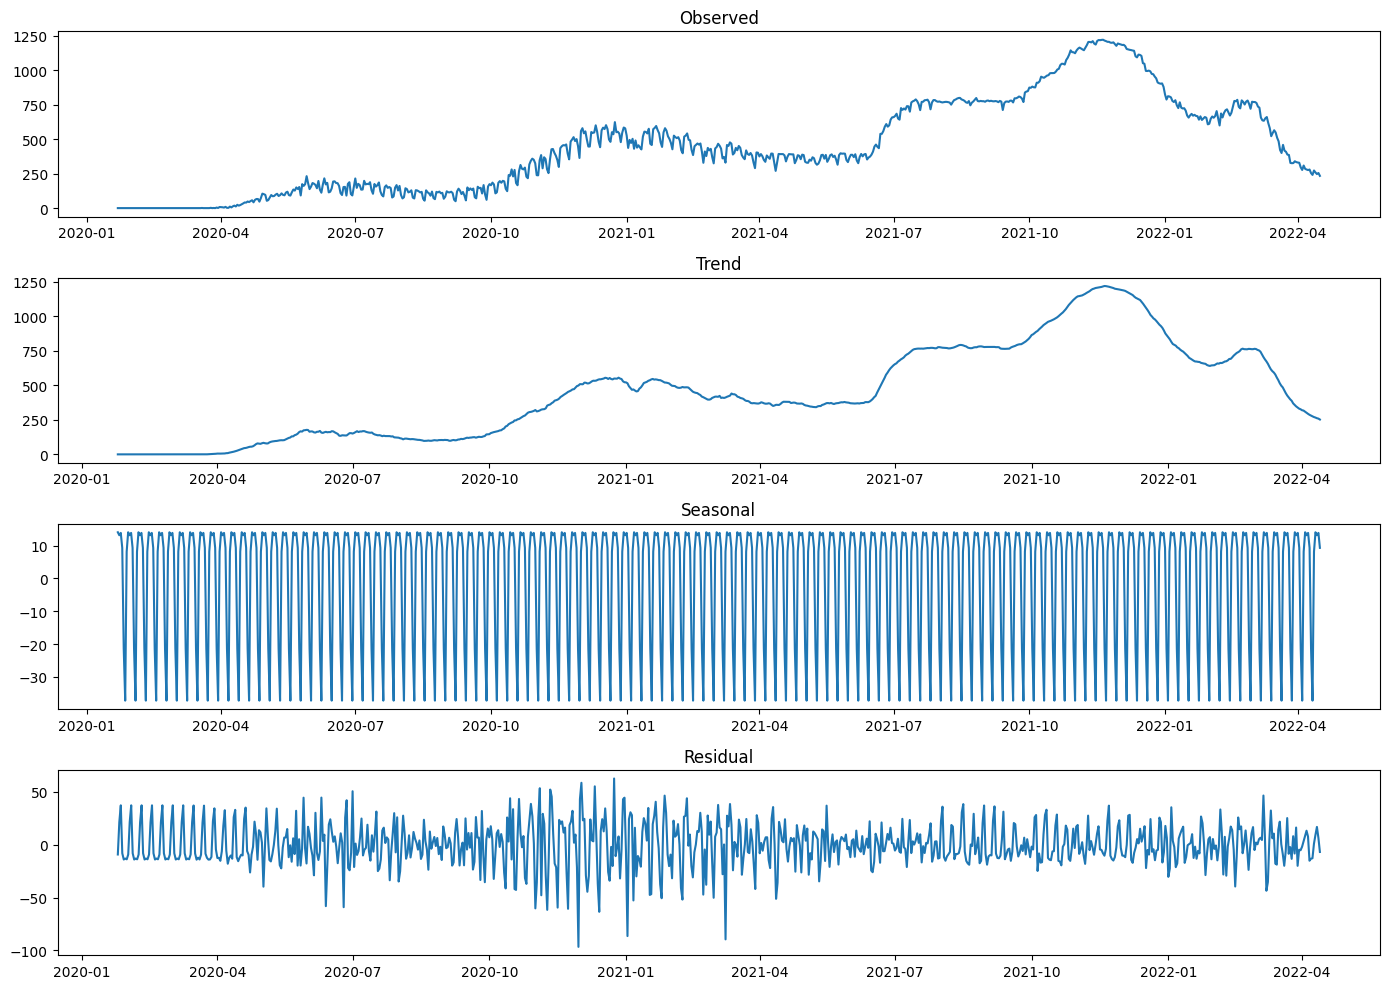

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'OT' time series
decomposition = seasonal_decompose(data['Daily_Deaths'], model='additive')  # Assuming daily data with weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


The strong seasonal pattern indicates that the oil temperature exhibits regular fluctuations within each half-a-year and a quarter.

The residuals show some irregular variations, but their behavior seems relatively stable over time.

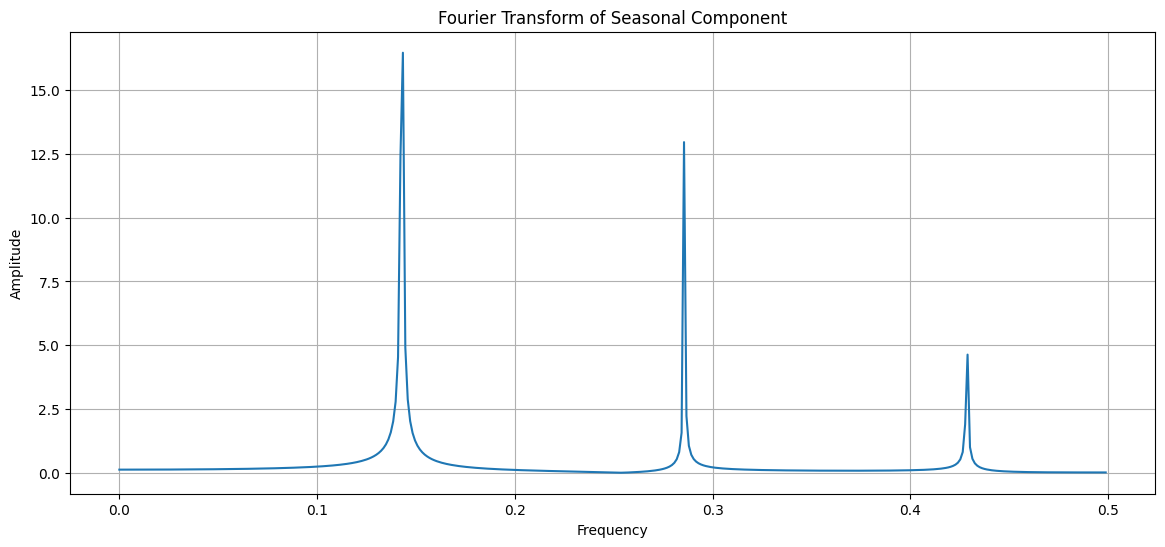

In [ ]:
from scipy.fft import fft

seasonal_component = decomposition.seasonal.dropna()
# Convert the seasonal component to a numpy array
seasonal_component_np = seasonal_component.to_numpy()

# Perform Fourier Transform on the seasonal component
fft_values = fft(seasonal_component_np)
fft_freqs = np.fft.fftfreq(len(seasonal_component_np))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_fft_values = 2.0/len(seasonal_component_np) * np.abs(fft_values[fft_freqs >= 0])

# Plot the Fourier Transform results
plt.figure(figsize=(14, 6))
plt.plot(positive_freqs, positive_fft_values)
plt.title('Fourier Transform of Seasonal Component')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**Dominant Frequencies:**

* The highest peak at the lowest frequency indicates a strong long-term seasonality.
* Additional peaks at higher frequencies represent shorter periodic cycles, such as daily or weekly patterns.

**Long-term Seasonality:**

* The significant peak at a very low frequency suggests the presence of long-term cycles, potentially quarterly or yearly.
* This confirms the presence of quarterly seasonality observed in the seasonal decomposition.


In [ ]:
target = "Daily_Deaths"

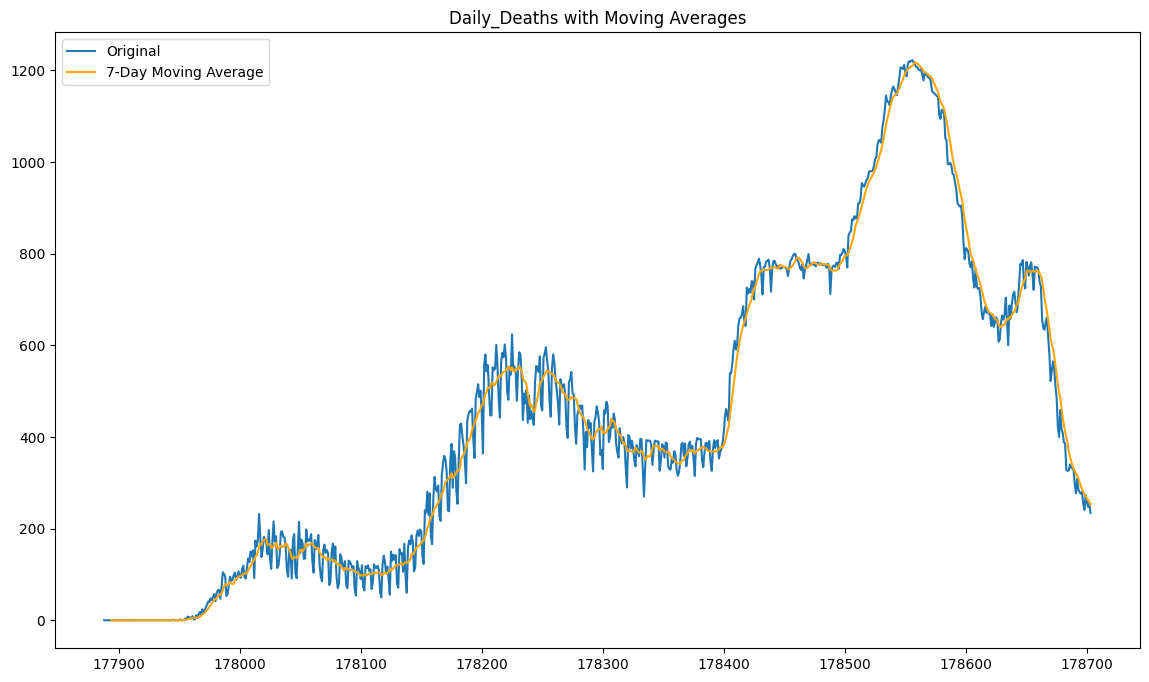

In [ ]:
data['MA_7'] = data[target].rolling(window=7).mean()  # 7-day moving average (168 hours)
data['MA_15'] = data[target].rolling(window=15).mean()  # 15-day moving average (168 hours)
data['MA_30'] = data[target].rolling(window=30).mean()  # 30-day moving average (720 hours)

# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data[target], label='Original')
plt.plot(data['MA_7'], label='7-Day Moving Average', color='orange')
plt.title('Daily_Deaths with Moving Averages')
plt.legend()
plt.show()

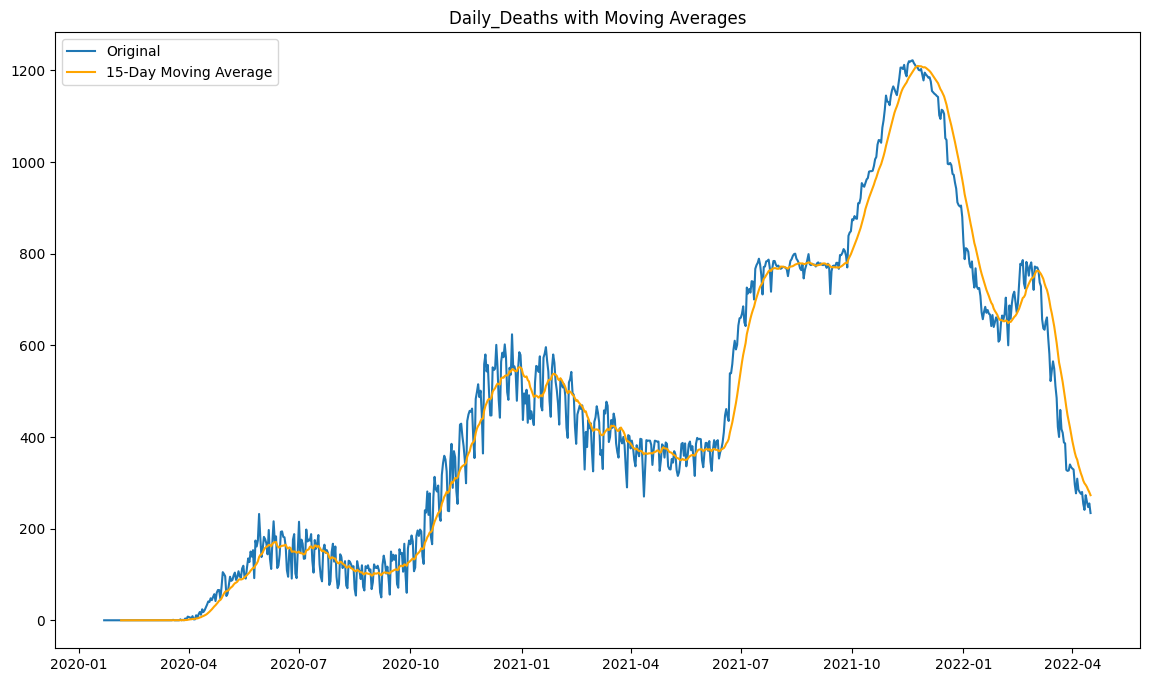

In [ ]:
# Plotting the original series with moving averages
plt.figure(figsize=(14, 8))
plt.plot(data[target], label='Original')
plt.plot(data['MA_15'], label='15-Day Moving Average', color='orange')
plt.title('Daily_Deaths with Moving Averages')
plt.legend()
plt.show()

## Autocorrelation Analysis

**Autocorrelation Function (ACF)**

The ACF plot for the 'OT' series shows significant autocorrelations at multiple lags, indicating that the series is not white noise and exhibits dependencies over time. The presence of significant lags suggests seasonality.


**Partial Autocorrelation Function (PACF)**

The PACF plot indicates the partial correlation of the series with its own lags. The first few lags show significant partial autocorrelations, which will help in identifying the order of the AR component in the ARIMA model.

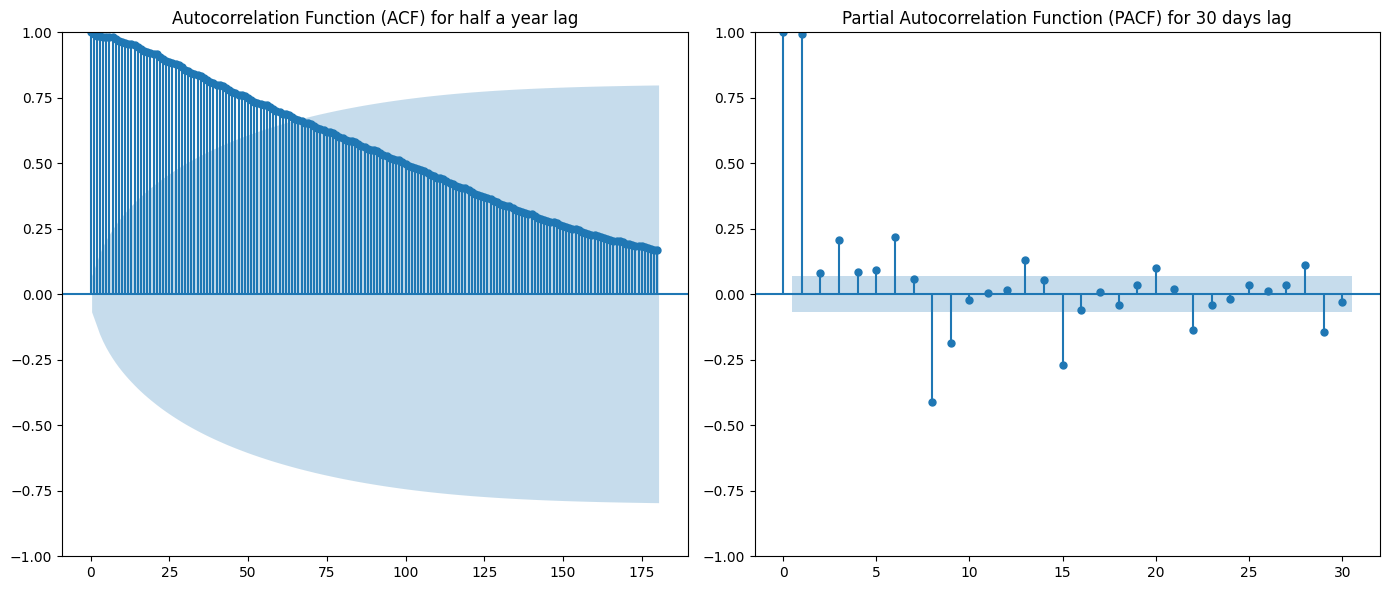

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for 'OT'
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(data[target], lags=30*6, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for half a year lag')

plt.subplot(122)
plot_pacf(data[target], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for 30 days lag')

plt.tight_layout()
plt.show()

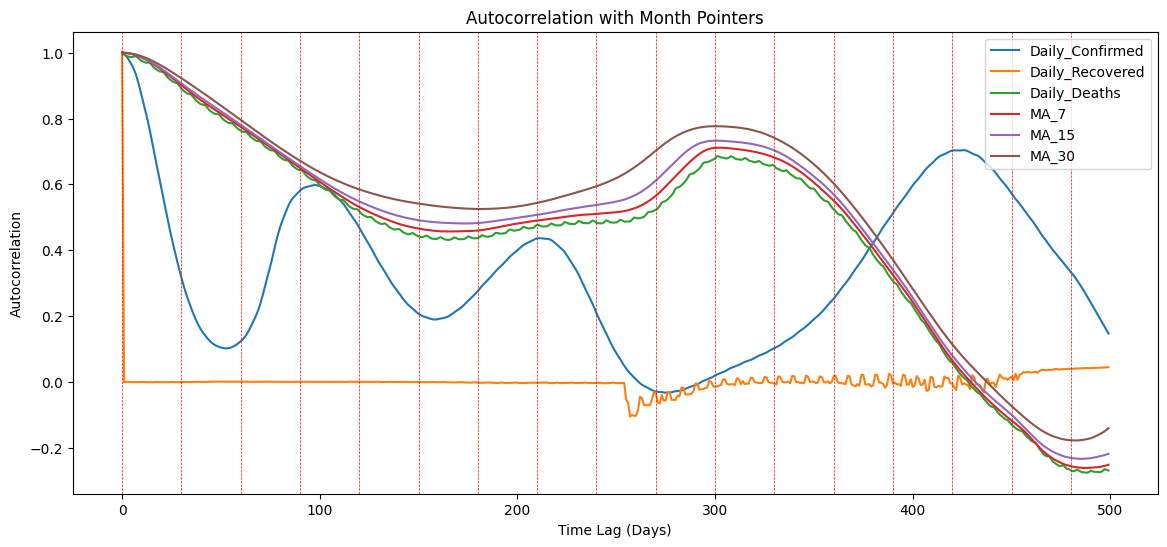

In [ ]:
lags = 500

plt.figure(figsize=(14, 6))
for column in data.columns:
    if column != "Date":
        autocorrelations = [data[column].autocorr(lag) for lag in range(lags)]
        plt.plot(range(lags), autocorrelations, label=column)

# Add vertical lines for day (24 hours) pointers
for day in range(0, lags, 30):
    plt.axvline(x=day, color='red', linestyle='--', linewidth=0.5)

plt.title('Autocorrelation with Month Pointers')
plt.xlabel('Time Lag (Days)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

## Regression Analysis Summary

In [ ]:
import numpy as np
import statsmodels.api as sm
# Define the target and features
X = data.drop(target, axis=1)
y = data[target]

# Add a constant term for the regression intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Daily_Deaths   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           4.78e-42
Time:                        20:50:38   Log-Likelihood:                -5808.5
No. Observations:                 816   AIC:                         1.162e+04
Df Residuals:                     814   BIC:                         1.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             340.4686     12.869     26.456      0.000     315.208     365.729
Daily_Confirmed     0.0049      0.000     14.400      0.000       0.004       0.006
==============================================================================
Omnibus:                       54.744   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.812
Skew:                           0.634   Prob(JB):                     1.03e-13
Kurtosis:                       2.610   Cond. No.                     4.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model explains 20,3% of the variance in the 'OT' variable

## Residual Analysis

### normality check

In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

# Extract residuals
residuals = model.resid

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)

# Perform Durbin-Watson test for autocorrelation
durbin_watson_test = durbin_watson(residuals)

shapiro_test, durbin_watson_test


(ShapiroResult(statistic=0.9388867616653442, pvalue=8.467776793172665e-18),
 0.015281750717098497)

The Shapiro-Wilk test indicates that the residuals do not follow a normal distribution (p-value < 0.05). The residuals exhibit significant autocorrelation, suggesting that the model has not fully captured the time-dependent structure in the data.

The Durbin-Watson statistic is close to 0, indicating strong positive autocorrelation in the residuals. The non-normality of residuals further indicates that there may be other factors or nonlinear relationships that the current model does not account for.

## stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(data[target])

# Extract the test statistics
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

(adf_statistic, p_value, critical_values)

(-1.818626881203441,
 0.3712539601646724,
 {'1%': -3.4386126789104074,
  '5%': -2.865186972298872,
  '10%': -2.5687119871327146})

The ADF test statisticis more than the critical values at all significance levels (1%, 5%, and 10%). Additionally, the p-value is more than 0.05. Therefore, we don'treject the null hypothesis that the series has a unit root, indicating that the 'OT' series is stationary.

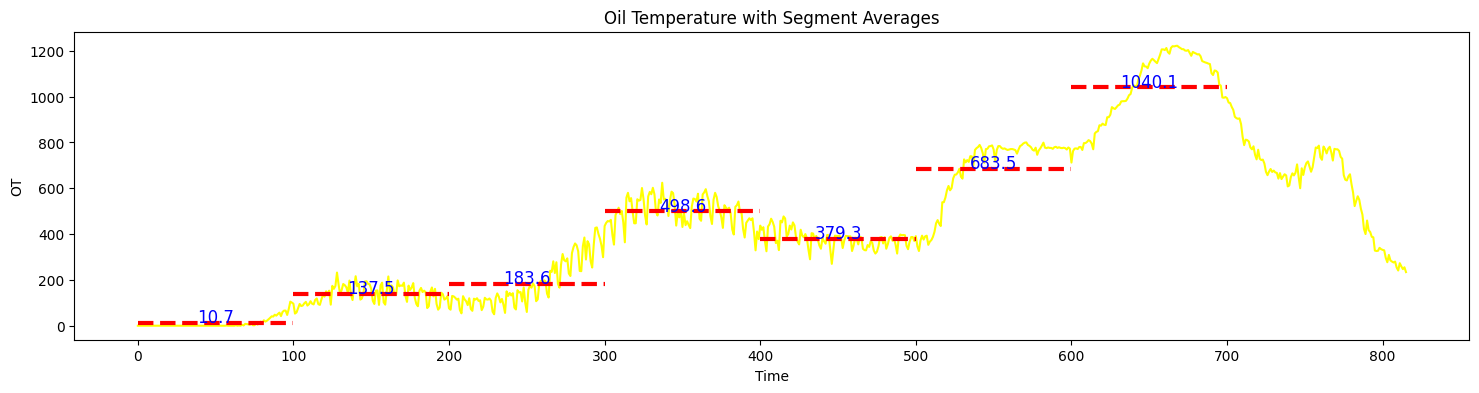

In [ ]:
import matplotlib.pyplot as plt

# Define segments and calculate average values for each segment
segment_indices = [(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700)]
segment_averages = [(start, end, data[target][start:end].mean()) for start, end in segment_indices]

# Plot the 'OT' series with segment averages
plt.figure(figsize=(18, 4))
plt.plot(data[target].values, color="yellow")

# Add horizontal lines and labels for each segment
for start, end, avg in segment_averages:
    medium = (start + end) / 2
    plt.hlines(y=avg, xmin=start, xmax=end, colors='red', linestyles='dashed', linewidth=3)
    plt.text(medium, avg + 2, f'{avg:.1f}', color='blue', fontsize=12, ha='center')

plt.xlabel('Time')
plt.ylabel('OT')
plt.title('Oil Temperature with Segment Averages')
plt.show()


## Arima model

In [73]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

# Display the first few rows of the dataset
data.tail()

Date Country/Region Province/State  Confirmed  Recovered  Deaths
231739 2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740 2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741 2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742 2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743 2022-04-16       Zimbabwe            NaN     247237        0.0    5462

In [74]:
data = data[data["Country/Region"]=="Russia"]

data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date if not already sorted
data = data.sort_values(by='Date')

# Calculate daily new cases
data['Daily_Confirmed'] = data['Confirmed'].diff().fillna(0)
data['Daily_Recovered'] = data['Recovered'].diff().fillna(0)
data['Daily_Deaths'] = data['Deaths'].diff().fillna(0)

data = data[["Date", "Daily_Confirmed", "Daily_Deaths"]]

<ipython-input-74-47a56eb8cfc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [89]:
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

# Setting the 'date' column as the index
# data.set_index('Date', inplace=True)
# Define the target columns (channels)
target_cols = data.columns.tolist()

split_config = {
    "train": [0, 23 * 30],
    "valid": [24 * 30 + 3 * 30, 24 * 30 + 3 * 30 + 6],
    "test": [
        23 * 30,
        23 * 30 + 4 * 30,
    ],
}

# Split the data according to the configuration
train_data = data.iloc[split_config["train"][0]:split_config["train"][1]]
valid_data = data.iloc[split_config["valid"][0]:split_config["valid"][1]]
test_data = data.iloc[split_config["test"][0]:split_config["test"][1]]


# Function to check stationarity and difference the data
def make_stationary(data, target_cols):
    differenced_data = data.copy()
    for col in target_cols:
        adf_result = adfuller(differenced_data[col])
        while adf_result[1] > 0.05:  # If p-value is greater than 0.05, the series is not stationary
            differenced_data[col] = differenced_data[col].diff().dropna()
            adf_result = adfuller(differenced_data[col].dropna())
    return differenced_data

# Make the train and test data stationary
train_data_stationary = make_stationary(train_data, target_cols)
test_data_stationary = make_stationary(test_data, target_cols)

# Function to evaluate ARIMA model for multi-channel data
def evaluate_arima_multi_channel(train, test, order, forecast_horizon, target_cols):
    history = {col: train[col].tolist() for col in target_cols}
    predictions = {col: [] for col in target_cols}

    for t in tqdm(range(len(test))):
        for col in target_cols:
            model = ARIMA(history[col], order=order)
            model_fit = model.fit()
            output = model_fit.forecast(steps=forecast_horizon)
            yhat = output[-1]
            predictions[col].append(yhat)
            history[col].append(test[col].iloc[t])

    print(test["Daily_Deaths"].fillna(0))
    print(pd.Series(predictions["Daily_Deaths"], index = test["Daily_Deaths"].index).fillna(0))
    # print(test["Daily_Confirmed"], predictions["Daily_Confirmed"])
    mse = {col: mean_squared_error(test[col].fillna(0), pd.Series(predictions[col], index = test[col].index).fillna(0)) for col in target_cols}
    # mae = {col: mean_absolute_error(test[col], predictions[col]) for col in target_cols}
    return mse, "mae", predictions

# Evaluate ARIMA models
forecast_horizon = 96
order = (5, 1, 0)
mse, _, predictions = evaluate_arima_multi_channel(train_data_stationary, test_data_stationary, order, forecast_horizon, target_cols)

# Display the results
print('MSE per channel:')
for col in mse:
    print(f'{col}: {mse[col]}')
# Calculate and display the aggregated MSE
aggregated_mse = sum(mse.values()) / len(mse)
print(f'\nAggregated MSE: {aggregated_mse}')


100%|██████████| 120/120 [01:17<00:00,  1.54it/s]

Date
2021-12-12     0.0
2021-12-13     0.0
2021-12-14    28.0
2021-12-15   -22.0
2021-12-16    -5.0
              ... 
2022-04-06   -56.0
2022-04-07    19.0
2022-04-08     1.0
2022-04-09     8.0
2022-04-10   -30.0
Name: Daily_Deaths, Length: 120, dtype: float64
Date
2021-12-12   -3.955303
2021-12-13   -3.955303
2021-12-14   -3.955303
2021-12-15    5.688531
2021-12-16   -1.788152
                ...   
2022-04-06    8.484114
2022-04-07   -4.375576
2022-04-08    2.540467
2022-04-09   -0.297369
2022-04-10    3.158062
Length: 120, dtype: float64
MSE per channel:
Daily_Confirmed: 539315796.8643507
Daily_Deaths: 2038.1135236407713

Aggregated MSE: 269658917.48893714


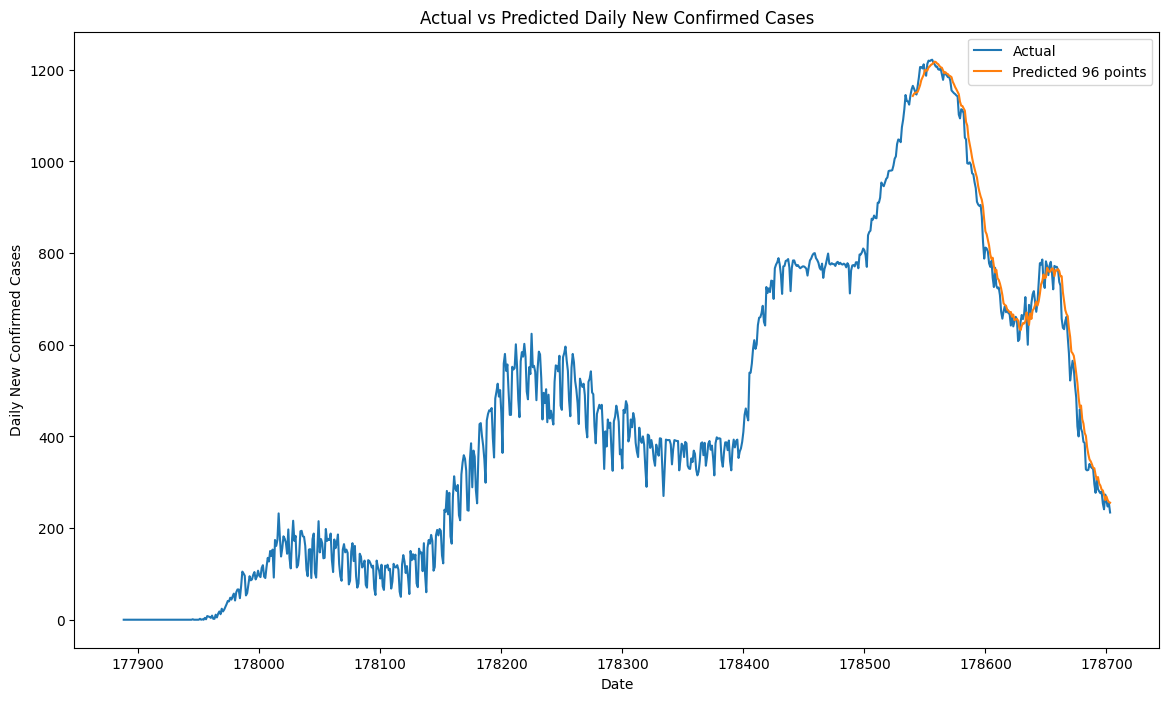

In [ ]:
# Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(data.index, data, label='Actual')
for horizon in [96]:
    plt.plot(test_data.index, results[horizon]['predictions'], label=f'Predicted {horizon} points')
plt.title('Actual vs Predicted Daily New Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Confirmed Cases')
plt.legend()
plt.show()